# Dhrupad Kumar Das

## Supervised Machine Learning Assignment (Mobile Price Prediction)

# Batch 10

# A. Explain the main assumptions of Linear Regression in detail.

## Ans : 
### Linearity
#### What it means: There is a linear relationship between the independent variables (X) and the dependent variable (Y).

#### Why it's important: If the relationship is not linear, the predictions and inference from the model will be misleading.

#### How to check: Use scatter plots or residual plots. Residuals (errors) should be randomly scattered without any pattern.

### 2. Independence of Errors
#### What it means: The residuals (errors) should be independent of each other.

#### Why it's important: Violation of this (e.g., in time series data) leads to autocorrelation, which undermines model accuracy and inference.

#### How to check: Use Durbin-Watson test to detect autocorrelation.

### 3. Homoscedasticity (Constant Variance of Errors)
#### What it means: The variance of errors should remain constant across all levels of the independent variables.

#### Why it's important: If error variance increases or decreases with X (i.e., heteroscedasticity), it can affect the reliability of coefficient estimates and confidence intervals.

#### How to check: Plot residuals vs. fitted values — look for funnel-shaped patterns (a sign of heteroscedasticity).

#### Fixes: Transformation of variables (e.g., log, square root) or using Weighted Least Squares.

### 4. Normality of Errors
#### What it means: The residuals should be normally distributed, especially important for hypothesis testing and confidence intervals.

#### Why it's important: Non-normal errors can distort p-values and confidence intervals.

#### How to check: Use Q-Q plots, histograms of residuals, or statistical tests like Shapiro-Wilk or Kolmogorov-Smirnov.

#### Note: This assumption is mainly relevant for small sample sizes.

### 5. No or Little Multicollinearity
#### What it means: Independent variables should not be highly correlated with each other.

#### Why it's important: Multicollinearity inflates the variance of coefficient estimates, making them unstable and difficult to interpret.

#### How to check: Use correlation matrix, Variance Inflation Factor (VIF) — VIF > 10 is often a red flag.

#### Fixes: Drop correlated features, combine them, or use Principal Component Analysis (PCA).

### 6. No Influential Outliers
#### What it means: Outliers should not disproportionately influence the regression line.

#### Why it's important: Extreme values can skew results, leading to inaccurate estimates.

#### How to check: Use leverage statistics, Cook’s distance, or standardized residuals.

#### Fixes: Remove or transform outliers, or use robust regression techniques.








## B. What is the difference between R-squared and Adjusted R-squared?

## Ans:
### R2 - Proportion of variance in dependent variable that is predictable from independent variable. R2 value ranges between (0-1). If the R2 value is closer to 1 that means its a very good model. for eg - 0.9, 0.98. And if R2 value is closer to 0 that means it is a very bad model. For eg - 0.2, 0.3.
### Formula:

###  R-squared (R²)'

* **Formula:**

  $$
  R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
  $$

  where:

  * $SS_{\text{res}}$ = sum of squared residuals
  * $SS_{\text{tot}}$ = total sum of squares

* **Key Point:**
  R-squared **always increases or stays the same** when you add more predictors, even if those predictors are irrelevant.

* **Limitation:**
  It does **not penalize** for adding unnecessary variables.

---

###  Adjusted R-squared

* **Definition:** A modified version of R-squared that **adjusts for the number of predictors** in the model. It tells you how well the model generalizes, accounting for overfitting.

* **Formula:**

  $$
  \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
  $$

  where:

  * $n$ = number of observations
  * $k$ = number of predictors

* **Key Point:**
  Adjusted R-squared **can decrease** if the added variable does not improve the model, making it more reliable for model comparison.

---

###  Key Differences

| Feature                       | R-squared                  | Adjusted R-squared                                    |
| ----------------------------- | -------------------------- | ----------------------------------------------------- |
| Value Range                   | 0 to 1                     | Can be < 0 (if model fits poorly), usually 0 to 1     |
| Penalizes Extra Predictors    | ❌ No                       | ✅ Yes                                                 |
| Increases with new predictors | ✅ Always or stays the same | ✅ Only if the new variable improves the model         |
| Best for...                   | Measuring overall fit      | Comparing models with different numbers of predictors |

---

###  When to Use Which?

* Use **R-squared** for **simple regression** or when the number of predictors is fixed.
* Use **Adjusted R-squared** when comparing **multiple regression models** with different numbers of predictors — it helps prevent **overfitting**.

---

# C. What are the different types of Regularization techniques in Regression. Explain in detail with cost functions of each technique.

In regression, **regularization** is a technique used to **prevent overfitting** by adding a penalty to the loss function for large model coefficients. This helps simplify the model and improve generalization to new data.

---

##  Common Regularization Techniques in Regression

### 1. **Ridge Regression (L2 Regularization)**

---

####  Description:

* Adds a **penalty proportional to the square of the magnitude** of the coefficients.
* Shrinks coefficients closer to zero but **never exactly zero**.
* Useful when many predictors are correlated.

####  Cost Function:

$$
J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

* $\lambda$: Regularization parameter (tuning control)
* $\beta_j$: Coefficients
* First term: Ordinary Least Squares loss
* Second term: L2 penalty

####  Effect:

* Reduces model complexity
* Keeps all variables in the model
* Does **not perform variable selection**

---

### 2. **Lasso Regression (L1 Regularization)**

---

####  Description:

* Adds a **penalty proportional to the absolute value** of the coefficients.
* Can shrink some coefficients **exactly to zero**, performing **feature selection**.
* Useful when you suspect that **only a few features are important**.

####  Cost Function:

$$
J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

####  Effect:

* Forces some coefficients to be zero
* Results in **sparse models**
* Good for **high-dimensional data** (e.g., text, genetics)

---

### 3. **Elastic Net Regression**

---

####  Description:

* A **hybrid** of Ridge and Lasso
* Combines L1 and L2 penalties
* Useful when:

  * There are **correlated predictors**
  * You want **feature selection** and **coefficient shrinkage**

####  Cost Function:

$$
J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$

Or, more commonly:

$$
J(\beta) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \left[ \alpha \sum_{j=1}^{p} |\beta_j| + (1 - \alpha) \sum_{j=1}^{p} \beta_j^2 \right]
$$

* $\alpha \in [0, 1]$: Mixing parameter between Lasso (L1) and Ridge (L2)
* $\lambda$: Regularization strength

####  Effect:

* Balances between Ridge and Lasso
* Offers flexibility with correlated features and sparsity

---

##  Comparison Summary

| Feature                   | Ridge (L2)       | Lasso (L1) | Elastic Net |   |                     |
| ------------------------- | ---------------- | ---------- | ----------- | - | ------------------- |
| Penalty Type              | $\sum \beta_j^2$ | ( \sum     | \beta\_j    | ) | Combination of both |
| Shrinks Coefficients      | ✅ Yes            | ✅ Yes      | ✅ Yes       |   |                     |
| Sets Coefficients to Zero | ❌ No             | ✅ Yes      | ✅ Sometimes |   |                     |
| Feature Selection         | ❌ No             | ✅ Yes      | ✅ Yes       |   |                     |
| Handles Multicollinearity | ✅ Yes            | ❌ No       | ✅ Yes       |   |                     |

---

##  Choosing the Right Regularization

* **Use Ridge** if all features are useful and multicollinearity is an issue.
* **Use Lasso** when you suspect many features are irrelevant.
* **Use Elastic Net** when:

  * You want the benefits of both L1 and L2.
  * Features are correlated and sparse.

---


## D. How logistic regression works for multiclass classification. Explain in detail.

Logistic regression is naturally designed for **binary classification**, but it can be **extended** to handle **multiclass classification** problems using specific strategies.

---

##  Problem Setup

Suppose we have a target variable $y$ with **more than two classes** — say, Class A, B, and C. The goal is to build a model that can assign a given input to **one of these multiple classes**.

---

##  Common Techniques for Multiclass Logistic Regression

### 1. **One-vs-Rest (OvR) / One-vs-All (OvA)**

---

####  How it works:

* For **k classes**, the model trains **k separate binary classifiers**.
* Each classifier predicts:

  > "Is this sample class **i** or not?"

####  Prediction:

* All k classifiers are applied to a new input.
* The class whose classifier gives the **highest probability** is chosen.

####  Example:

For 3 classes: A, B, C

* Train 3 models:

  * Model 1: A vs not A
  * Model 2: B vs not B
  * Model 3: C vs not C
* Predict the probabilities from all 3 models.
* Choose the class with the highest probability.

####  Pros:

* Simple and widely used.
* Works with standard logistic regression.

####  Cons:

* Models may be inconsistent (e.g., two classifiers might predict "yes").
* Doesn’t model class relationships.

---

### 2. **Multinomial Logistic Regression (Softmax Regression)**

---

####  How it works:

* Models **all classes in a single model** using the **softmax function**.
* Instead of a sigmoid, it uses **softmax** to output **probabilities for each class**.

####  Formula:

Let’s say we have k classes and feature vector $\vec{x}$:

For class $j$:

$$
P(y = j \mid \vec{x}) = \frac{e^{\vec{\beta}_j \cdot \vec{x}}}{\sum_{i=1}^{k} e^{\vec{\beta}_i \cdot \vec{x}}}
$$

* $\vec{\beta}_j$: Coefficients for class $j$
* Output: A **probability distribution** over all classes

####  Prediction:

* Choose the class with the **highest probability** from softmax.

####  Pros:

* More consistent and elegant.
* Better at modeling class competition and relationships.

####  Cons:

* Computationally more expensive.
* Harder to interpret compared to OvR.

---

##  Comparison: OvR vs Multinomial

| Feature          | One-vs-Rest (OvR)           | Multinomial Logistic Regression |
| ---------------- | --------------------------- | ------------------------------- |
| Number of Models | k                           | 1                               |
| Output           | k independent probabilities | One softmax probability vector  |
| Complexity       | Lower                       | Higher                          |
| Preferred for    | Simpler setups              | Balanced, correlated classes    |

---

##  In Practice (e.g., scikit-learn in Python)

```python
from sklearn.linear_model import LogisticRegression

# One-vs-Rest
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Multinomial
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
```

---

##  Summary

* **Logistic regression can handle multiclass problems** using either:

  * **One-vs-Rest (OvR)**: One model per class.
  * **Multinomial (Softmax)**: One model for all classes using probabilities.
* **Multinomial** is generally preferred for modern multiclass classification because it gives a more holistic view of class probabilities.

---



## E. Explain the performance metrics of logistic regression.

Logistic Regression is a **classification algorithm**, and its performance is typically evaluated using **classification metrics**. These metrics help measure how well the model predicts the correct class labels, especially in binary or multiclass settings.

---

##  1. **Accuracy**

---

###  Definition:

The proportion of total predictions that the model got **correct**.

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

* **TP** = True Positives
* **TN** = True Negatives
* **FP** = False Positives
* **FN** = False Negatives

###  When to use:

* When classes are **balanced**.

###  Limitation:

* Misleading with **imbalanced classes** (e.g., 95% of class A, 5% of class B).

---

##  2. **Precision**

---

###  Definition:

Out of all the predicted positive cases, how many were actually positive?

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

###  When to use:

* Important when **false positives** are costly (e.g., spam detection, cancer diagnosis).

---

##  3. **Recall (Sensitivity or True Positive Rate)**

---

###  Definition:

Out of all actual positive cases, how many did the model correctly identify?

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

###  When to use:

* Important when **false negatives** are costly (e.g., fraud detection, disease diagnosis).

---

##  4. **F1-Score**

---

###  Definition:

The **harmonic mean** of precision and recall. Balances both metrics.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

###  When to use:

* Best when there’s an **uneven class distribution**.
* Useful when both false positives and false negatives are important.

---

##  5. **Confusion Matrix**

---

A table that shows how well the model is performing:

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

Helps you compute **all other metrics**.

---

##  6. **ROC Curve (Receiver Operating Characteristic)**

---

* Plots **True Positive Rate (Recall)** vs. **False Positive Rate**.
* Helps evaluate the **trade-off between sensitivity and specificity** at various thresholds.

---

##  7. **AUC (Area Under the ROC Curve)**

---

* Value between **0 and 1**
* The higher the AUC, the better the model is at distinguishing between classes.
* **AUC = 1**: Perfect classifier
* **AUC = 0.5**: No better than random guessing

---

##  8. **Log Loss (Logarithmic Loss or Cross-Entropy Loss)**

---

###  Definition:

Measures how close the predicted probabilities are to the actual class labels.

$$
\text{Log Loss} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

* Lower log loss = better performance
* Penalizes confident but wrong predictions more heavily

---

##  Summary Table

| Metric    | Best For                               | Range    |
| --------- | -------------------------------------- | -------- |
| Accuracy  | Balanced datasets                      | 0 to 1   |
| Precision | When false positives are costly        | 0 to 1   |
| Recall    | When false negatives are costly        | 0 to 1   |
| F1-Score  | Balance between precision and recall   | 0 to 1   |
| ROC AUC   | Overall model discrimination           | 0.5 to 1 |
| Log Loss  | Penalizing wrong/confident predictions | 0 to ∞   |

---


## F. Use the Mobile price prediction dataset from below Kaggle link and create an end to end project on Jupyter/Colab.

### i.	Download the dataset from above link and load it into your Python environment.
### ii.	Perform the EDA and do the visualizations.
### iii.	Check the distributions/skewness in the variables and do the transformations if required.
### iv.	Check/Treat the outliers and do the feature scaling if required.
### v.	Create a ML model to predict the price of the phone based on the specifications given.
### vi.	Check for overfitting and use the Regularization techniques if required
### vii.	Compare the performance metrics of training dataset and testing dataset for all the different algorithms used (Linear/Ridge/Lasso/ElasticNet)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [3]:
Mobile_df = pd.read_csv("Cellphone.csv")
Mobile_df.head(5)

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

In [4]:
Mobile_df.tail(5)

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
156        1206   3551  4638   178.0         5.46  538         4     1.875   
157        1296   3211  8016   170.0         5.50  534         4     1.975   
158         856   3260  8809   150.0         5.50  401         8     2.200   
159        1296   3211  8946   170.0         5.50  534         4     1.975   
160        1131   2536  9807   202.0         6.00  367         8     1.500   

     internal mem  ram  RearCam  Front_Cam  battery  thickness  
156         128.0  6.0     12.0       16.0     4080        8.4  
157         128.0  6.0     20.0        8.0     3400        7.9  
158          64.0  4.0     20.0       20.0     3000        6.8  
159         128.0  6.0     20.0        8.0     3400        7.9  
160          16.0  3.0     21.5       16.0     2700        8.4

In [5]:
Mobile_df.sample(5)

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
25          776   1390    24   146.0          5.0  220         4     1.200   
109         637   2858   285   174.0          5.7  513         4     1.875   
21          860   2392    22   147.0          5.2  282         8     1.400   
101         827    833   201    78.4          2.4  166         0     0.000   
34         1339   1421    31   120.0          4.0  233         2     1.000   

     internal mem    ram  RearCam  Front_Cam  battery  thickness  
25            8.0  1.000      5.0        5.0     1905        8.8  
109          32.0  4.000     16.0        5.0     3200        7.6  
21           32.0  3.000     13.0       16.0     2900        7.7  
101           0.0  0.008      0.0        0.0     1100       12.9  
34            4.0  0.512      2.0        0.0     1200        9.8

In [6]:
# Since Product_id is not so important so I will drop that column
Mobile_df.drop(["Product_id"], axis = 1, inplace = True)

In [7]:
# Renaming the columns(Capitalising the first word to maintain the consistency)
Mobile_df.rename(columns = {'weight' : 'Weight', 'resoloution': 'Resolution', 'ppi': 'PPI', 'cpu core': 'CPU Core', 'cpu freq':
                           'CPU Freq', 'internal mem': 'Internal Mem', 'ram': 'RAM', 'RearCam': 'Rear Cam', 'Front_Cam': 
                           'Front Cam', 'battery': 'Battery', 'thickness': 'Thickness'}, inplace = True)

In [8]:
Mobile_df.head(5)

Price  Sale  Weight  Resolution  PPI  CPU Core  CPU Freq  Internal Mem  \
0   2357    10   135.0         5.2  424         8      1.35          16.0   
1   1749    10   125.0         4.0  233         2      1.30           4.0   
2   1916    10   110.0         4.7  312         4      1.20           8.0   
3   1315    11   118.5         4.0  233         2      1.30           4.0   
4   1749    11   125.0         4.0  233         2      1.30           4.0   

     RAM  Rear Cam  Front Cam  Battery  Thickness  
0  3.000     13.00        8.0     2610        7.4  
1  1.000      3.15        0.0     1700        9.9  
2  1.500     13.00        5.0     2000        7.6  
3  0.512      3.15        0.0     1400       11.0  
4  1.000      3.15        0.0     1700        9.9

In [9]:
Mobile_df.shape

(161, 13)

### So we have 161 rows and 13 columns

In [10]:
Mobile_df.columns

Index(['Price', 'Sale', 'Weight', 'Resolution', 'PPI', 'CPU Core', 'CPU Freq',
       'Internal Mem', 'RAM', 'Rear Cam', 'Front Cam', 'Battery', 'Thickness'],
      dtype='object')

In [11]:
Mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   Weight        161 non-null    float64
 3   Resolution    161 non-null    float64
 4   PPI           161 non-null    int64  
 5   CPU Core      161 non-null    int64  
 6   CPU Freq      161 non-null    float64
 7   Internal Mem  161 non-null    float64
 8   RAM           161 non-null    float64
 9   Rear Cam      161 non-null    float64
 10  Front Cam     161 non-null    float64
 11  Battery       161 non-null    int64  
 12  Thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [12]:
Mobile_df.describe().T

count         mean          std    min     25%      50%  \
Price         161.0  2215.596273   768.187171  614.0  1734.0  2258.00   
Sale          161.0   621.465839  1546.618517   10.0    37.0   106.00   
Weight        161.0   170.426087    92.888612   66.0   134.1   153.00   
Resolution    161.0     5.209938     1.509953    1.4     4.8     5.15   
PPI           161.0   335.055901   134.826659  121.0   233.0   294.00   
CPU Core      161.0     4.857143     2.444016    0.0     4.0     4.00   
CPU Freq      161.0     1.502832     0.599783    0.0     1.2     1.40   
Internal Mem  161.0    24.501714    28.804773    0.0     8.0    16.00   
RAM           161.0     2.204994     1.609831    0.0     1.0     2.00   
Rear Cam      161.0    10.378261     6.181585    0.0     5.0    12.00   
Front Cam     161.0     4.503106     4.342053    0.0     0.0     5.00   
Battery       161.0  2842.111801  1366.990838  800.0  2040.0  2800.00   
Thickness     161.0     8.921739     2.192564    5.1     7.6     8.40   

                   75%     max  
Price         2744.000  4361.0  
Sale           382.000  9807.0  
Weight         170.000   753.0  
Resolution       5.500    12.2  
PPI            428.000   806.0  
CPU Core         8.000     8.0  
CPU Freq         1.875     2.7  
Internal Mem    32.000   128.0  
RAM              3.000     6.0  
Rear Cam        16.000    23.0  
Front Cam        8.000    20.0  
Battery       3240.000  9500.0  
Thickness        9.800    18.5

## Checking NaN values in our Dataset

In [13]:
Mobile_df.isnull().sum().to_frame().rename(columns =  {0 : 'Total number of missing values'})

Total number of missing values
Price                                      0
Sale                                       0
Weight                                     0
Resolution                                 0
PPI                                        0
CPU Core                                   0
CPU Freq                                   0
Internal Mem                               0
RAM                                        0
Rear Cam                                   0
Front Cam                                  0
Battery                                    0
Thickness                                  0

## Checking for Duplicate Values

In [14]:
print("Duplicate Values =",Mobile_df.duplicated().sum())

Duplicate Values = 0


## Checking for the correlation

In [15]:
Correlation_Matrix =  Mobile_df.corr()
Correlation_Matrix

Price      Sale    Weight  Resolution       PPI  CPU Core  \
Price         1.000000  0.273263  0.144555    0.404010  0.817614  0.686811   
Sale          0.273263  1.000000  0.016114    0.017154  0.235896  0.069517   
Weight        0.144555  0.016114  1.000000    0.890416 -0.054683  0.216257   
Resolution    0.404010  0.017154  0.890416    1.000000  0.181292  0.472226   
PPI           0.817614  0.235896 -0.054683    0.181292  1.000000  0.487990   
CPU Core      0.686811  0.069517  0.216257    0.472226  0.487990  1.000000   
CPU Freq      0.727383  0.099133  0.222730    0.505454  0.713168  0.491519   
Internal Mem  0.776738  0.489308  0.098849    0.202660  0.618560  0.276251   
RAM           0.896915  0.373127  0.149283    0.327216  0.748724  0.483128   
Rear Cam      0.739538  0.292164 -0.029448    0.249892  0.774008  0.611353   
Front Cam     0.675286  0.437233 -0.005971    0.202720  0.491371  0.586698   
Battery       0.559946  0.120338  0.833783    0.843462  0.302517  0.459728   
Thickness    -0.716773 -0.047991 -0.185262   -0.533708 -0.496791 -0.697935   

              CPU Freq  Internal Mem       RAM  Rear Cam  Front Cam   Battery  \
Price         0.727383      0.776738  0.896915  0.739538   0.675286  0.559946   
Sale          0.099133      0.489308  0.373127  0.292164   0.437233  0.120338   
Weight        0.222730      0.098849  0.149283 -0.029448  -0.005971  0.833783   
Resolution    0.505454      0.202660  0.327216  0.249892   0.202720  0.843462   
PPI           0.713168      0.618560  0.748724  0.774008   0.491371  0.302517   
CPU Core      0.491519      0.276251  0.483128  0.611353   0.586698  0.459728   
CPU Freq      1.000000      0.441400  0.633547  0.625104   0.358319  0.473137   
Internal Mem  0.441400      1.000000  0.875354  0.451917   0.555733  0.461506   
RAM           0.633547      0.875354  1.000000  0.648073   0.647470  0.541001   
Rear Cam      0.625104      0.451917  0.648073  1.000000   0.596374  0.287821   
Front Cam     0.358319      0.555733  0.647470  0.596374   1.000000  0.295283   
Battery       0.473137      0.461506  0.541001  0.287821   0.295283  1.000000   
Thickness    -0.614458     -0.367412 -0.521074 -0.550998  -0.493542 -0.412682   

              Thickness  
Price         -0.716773  
Sale          -0.047991  
Weight        -0.185262  
Resolution    -0.533708  
PPI           -0.496791  
CPU Core      -0.697935  
CPU Freq      -0.614458  
Internal Mem  -0.367412  
RAM           -0.521074  
Rear Cam      -0.550998  
Front Cam     -0.493542  
Battery       -0.412682  
Thickness      1.000000

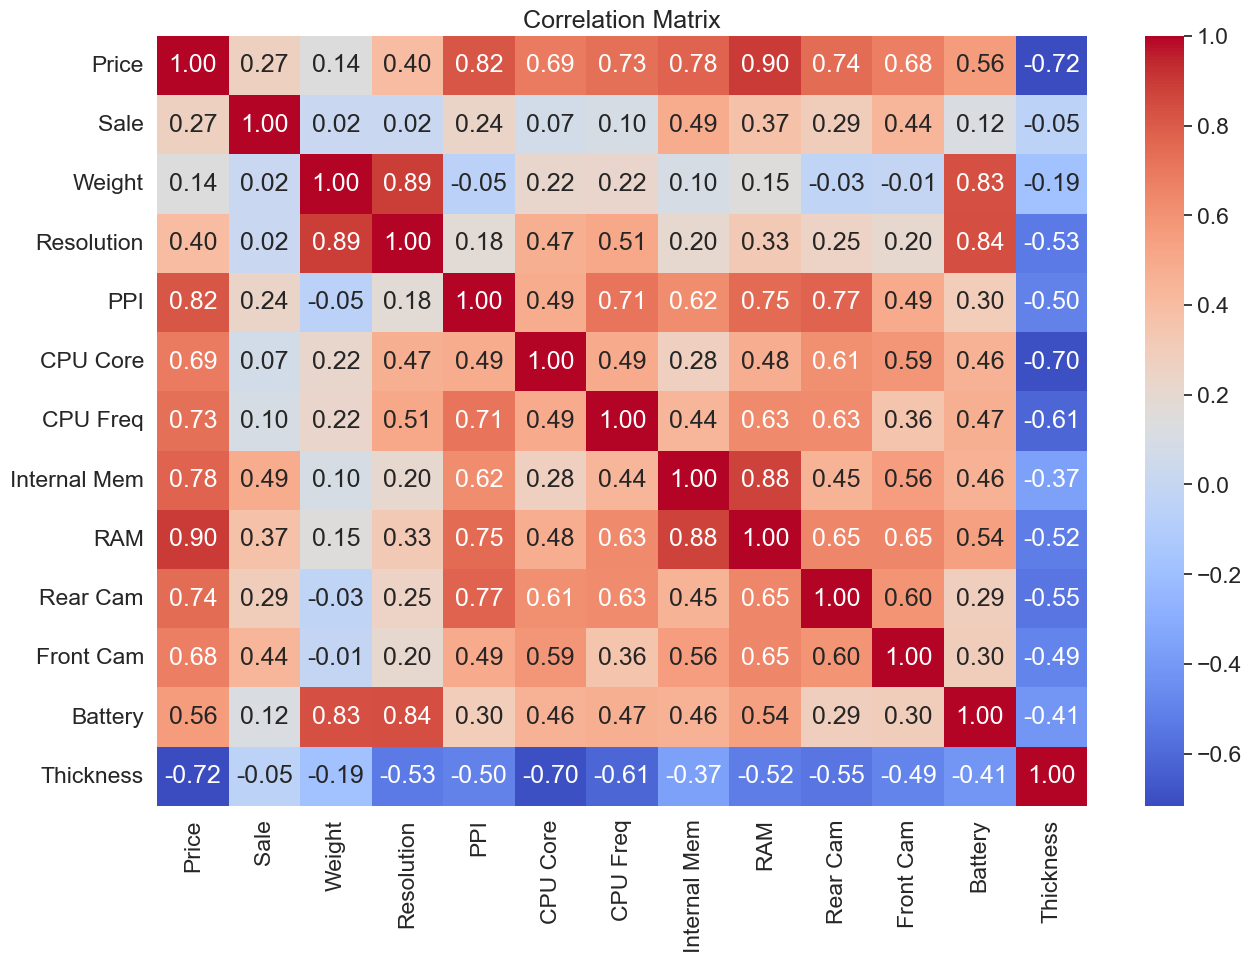

In [16]:
plt.figure(figsize = (15, 10))
sns.heatmap(Correlation_Matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

### From the above correlation matrix we can infer that 
### Price and [RAM, PPI, CPU Core, CPU Freq, Internal Mem, Rear Cam, Front Cam] are highly corelated to each other
### Weight and [Resolution, Battery] are highly corelated to each other
### Resolution and [Battery, Weight] are highly corelated to each other
### PPI and [CPU Freq, RAM, Rear Cam] are highly corelated to each other
### Internal Memory and [RAM]

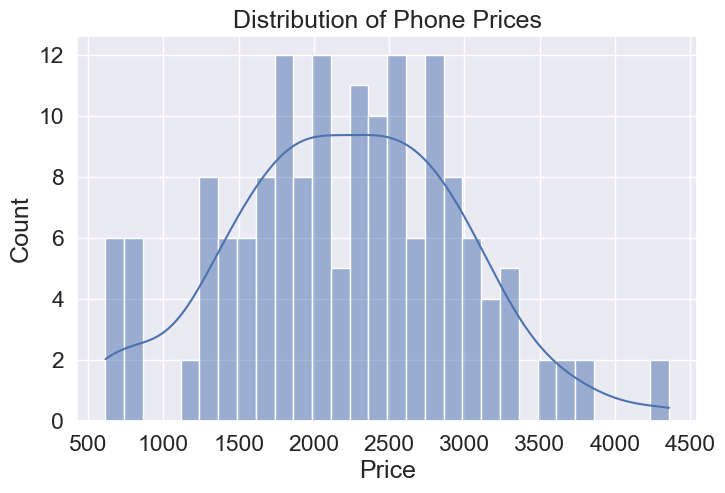

In [17]:
plt.figure(figsize = (8,5))
sns.histplot(Mobile_df['Price'], kde = True, bins = 30)
plt.title('Distribution of Phone Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## From the above distribution we can infer that Price has a normal distribution 

## Price VS RAM

In [18]:
Price_Vs_RAM = Mobile_df.groupby('RAM', as_index = False)['Price'].sum().sort_values(by = 'Price', ascending = False)
Price_Vs_RAM

RAM  Price
8   2.000  78804
9   3.000  71499
6   1.000  63260
10  4.000  61468
11  6.000  43346
5   0.512  18210
7   1.500   8760
1   0.004   4318
0   0.000   2714
2   0.008   1666
3   0.032   1410
4   0.128   1256

In [19]:
ram_order = Price_Vs_RAM['RAM']

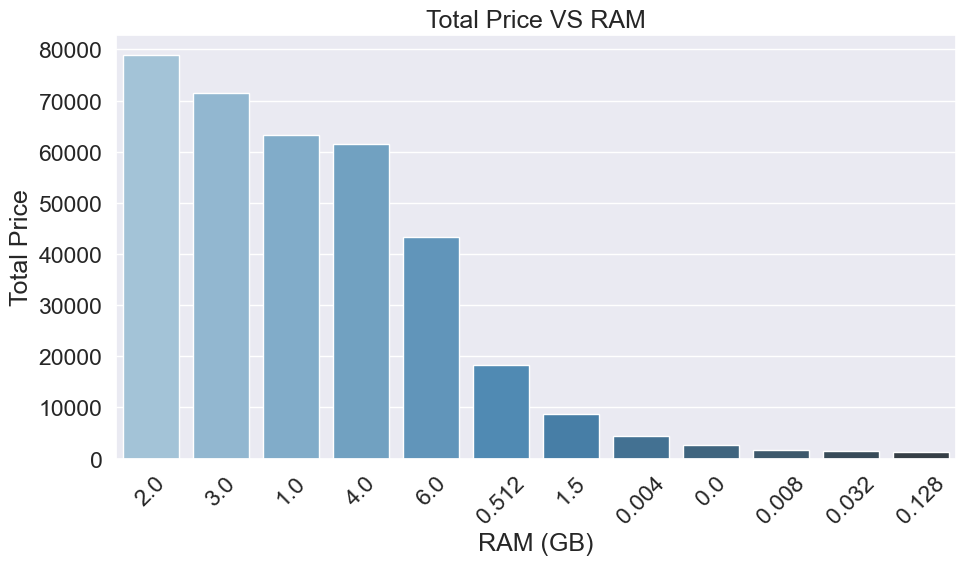

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(data = Price_Vs_RAM, x = 'RAM', y = 'Price', palette = 'Blues_d', order = ram_order)
plt.title('Total Price VS RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Total Price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## So, from here we can infer that:
### 2 GB phones are sold the most 
### 3 GB phones are at the second place and 
### 1 GB phones are at the third place

## Battery and Weight

In [21]:
# Top 5 most frequent battery values
top_batteries = Mobile_df['Battery'].value_counts().nlargest(5).index

In [22]:
# Filter the dataset to include only these top batteries
filtered_df = Mobile_df[Mobile_df['Battery'].isin(top_batteries)]

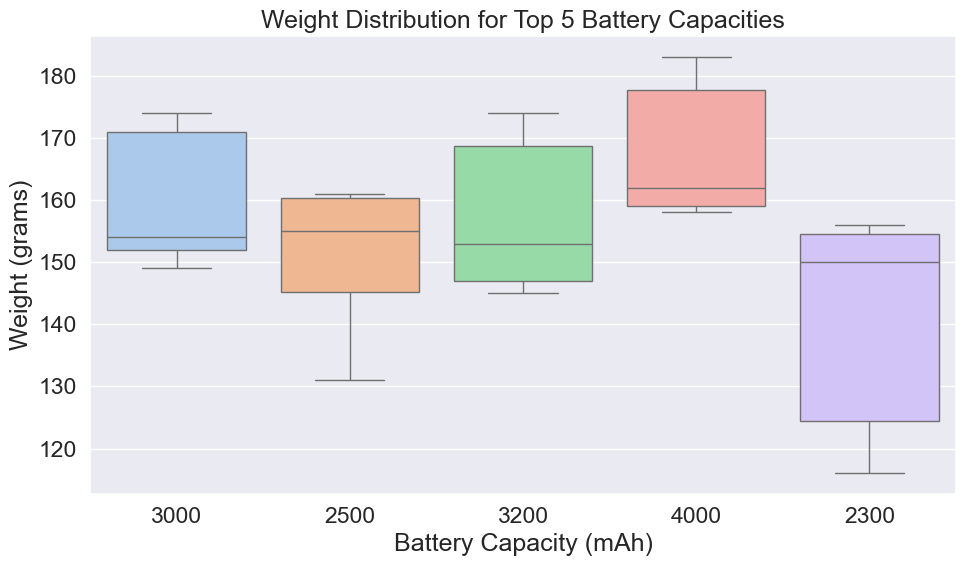

In [23]:
# Boxplot to visualize the weight distribution of top batteries
plt.figure(figsize = (10,6))
sns.boxplot(data = filtered_df, x = 'Battery', y = 'Weight', order = top_batteries, palette = 'pastel')

plt.title('Weight Distribution for Top 5 Battery Capacities')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (grams)')
plt.tight_layout()
plt.show()

## The batteries with the lowest Weight has less battery capacity compared to others.

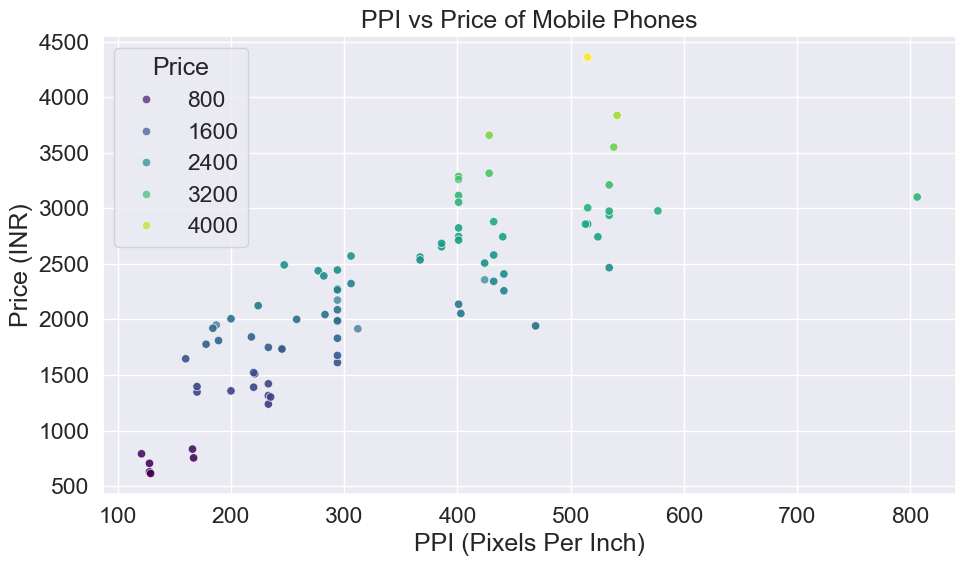

In [24]:
## Price VS PPI(Pixel Per Inch)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mobile_df, x='PPI', y='Price', hue='Price', palette='viridis', alpha=0.7)
plt.title('PPI vs Price of Mobile Phones')
plt.xlabel('PPI (Pixels Per Inch)')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pixel and price has almost the linear relationship. 

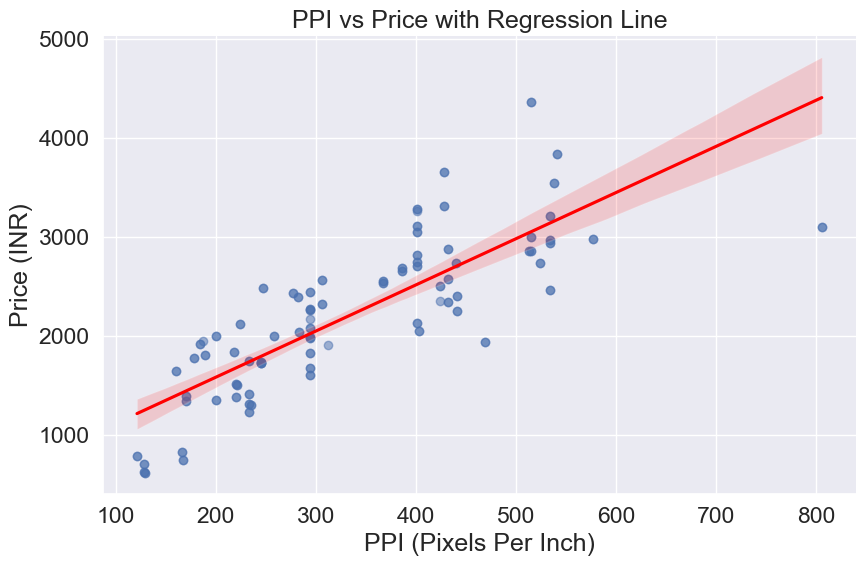

In [25]:
## Regression Plot (Trend Line to Show Relationship)

sns.lmplot(data=Mobile_df, x='PPI', y='Price', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('PPI vs Price with Regression Line')
plt.xlabel('PPI (Pixels Per Inch)')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

# Checking and treating the outlier

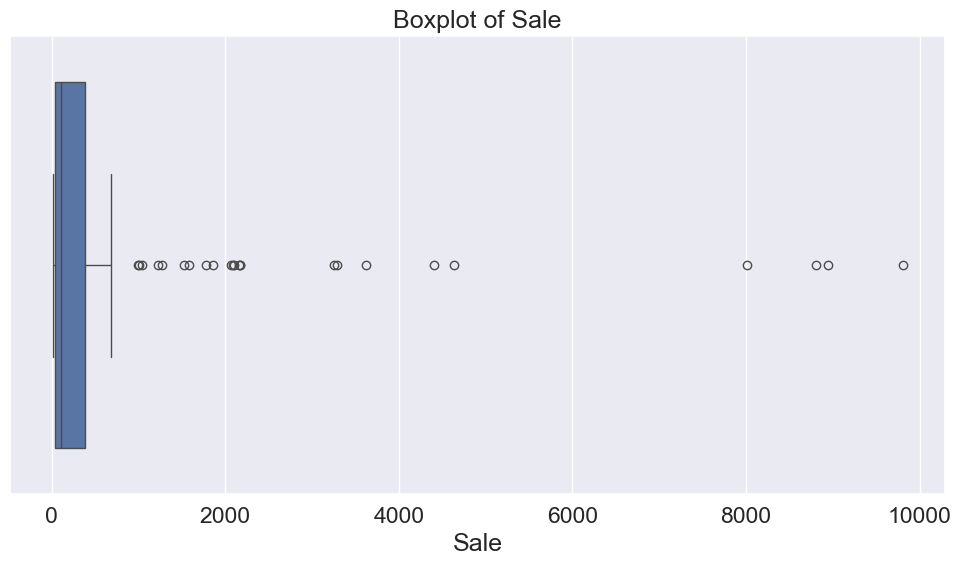

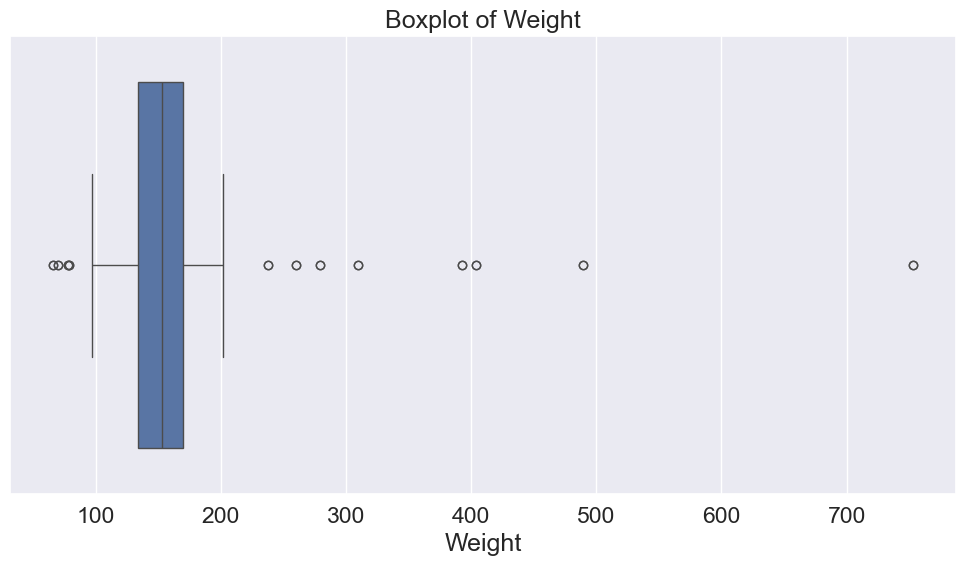

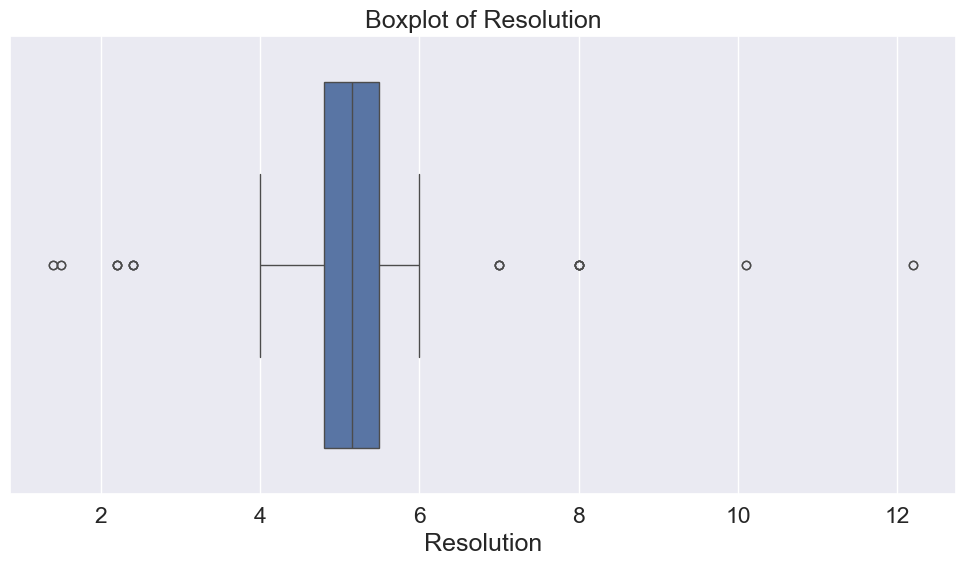

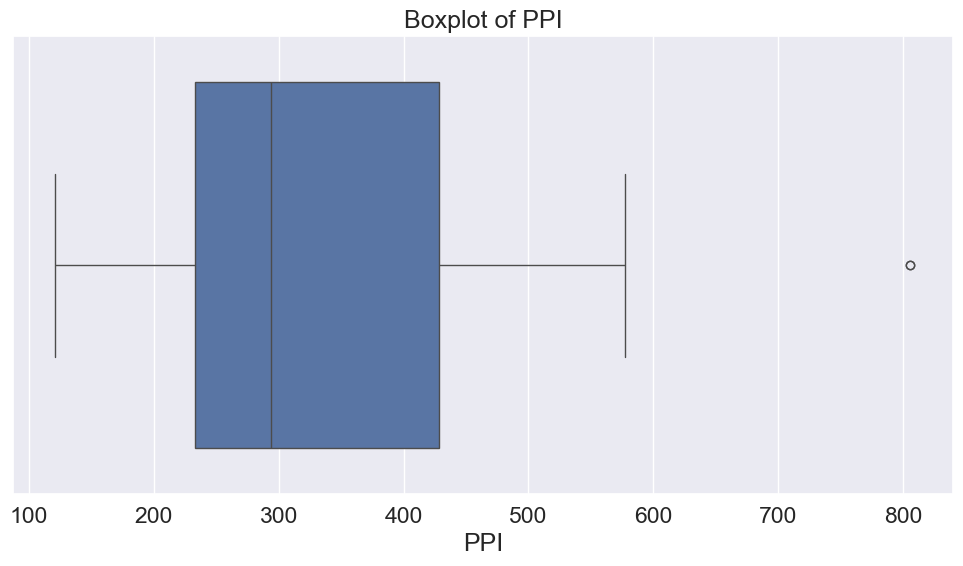

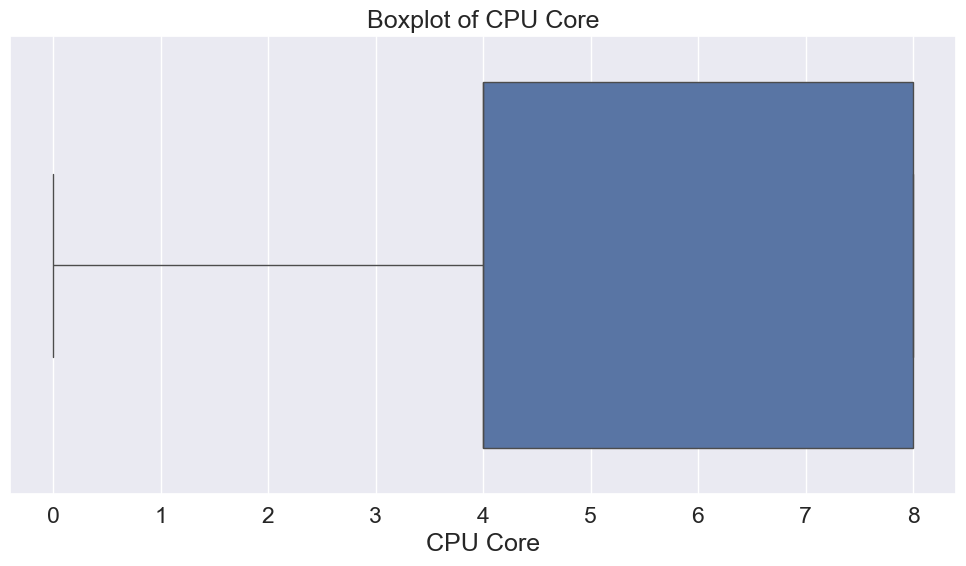

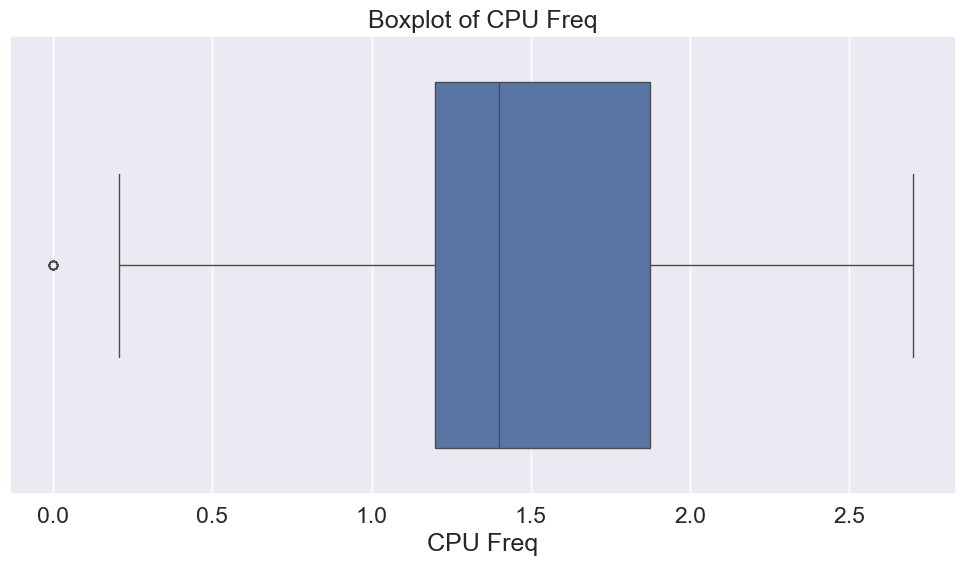

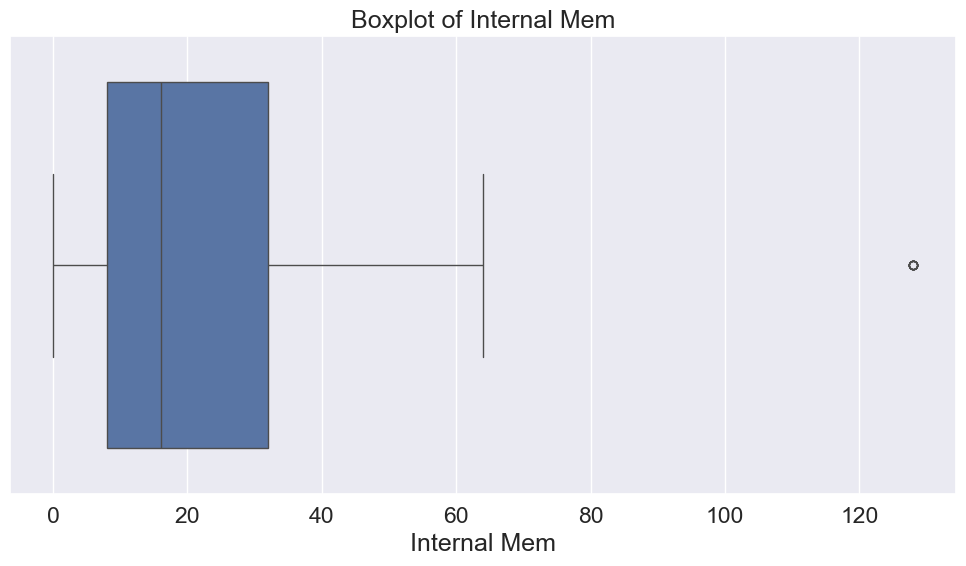

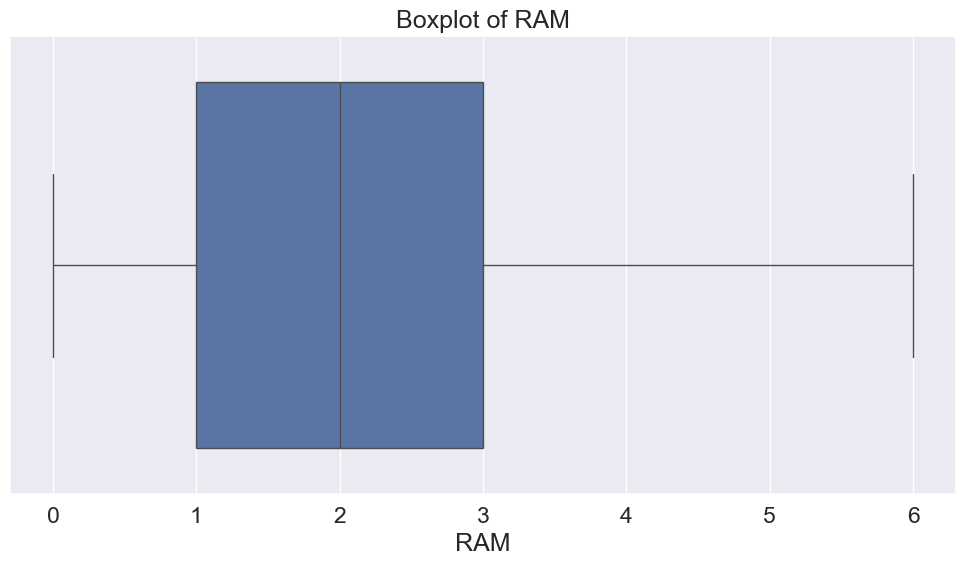

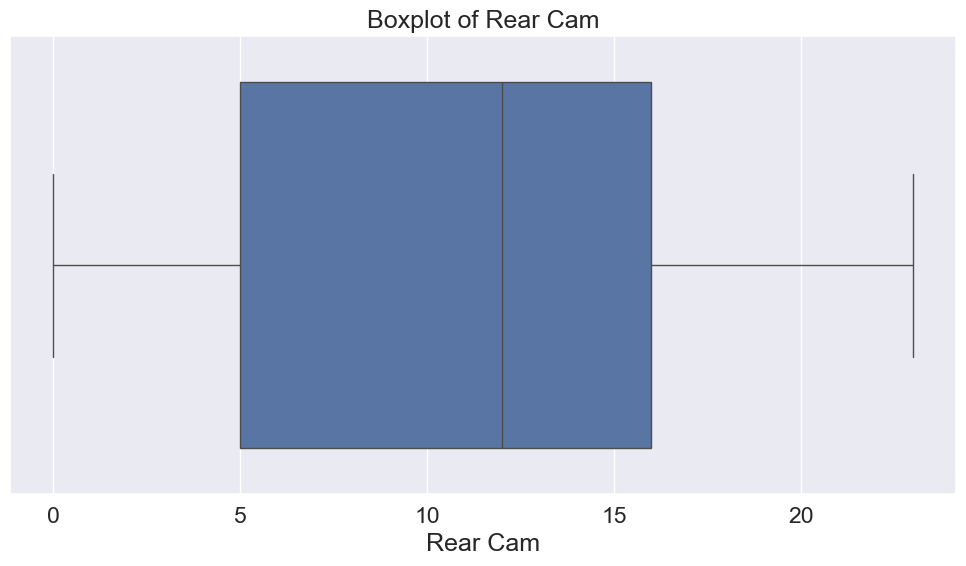

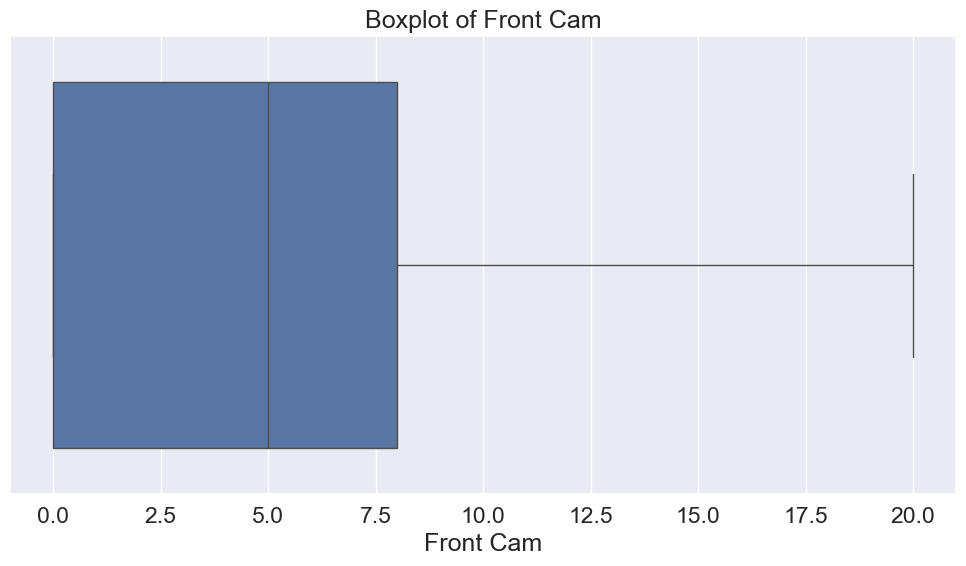

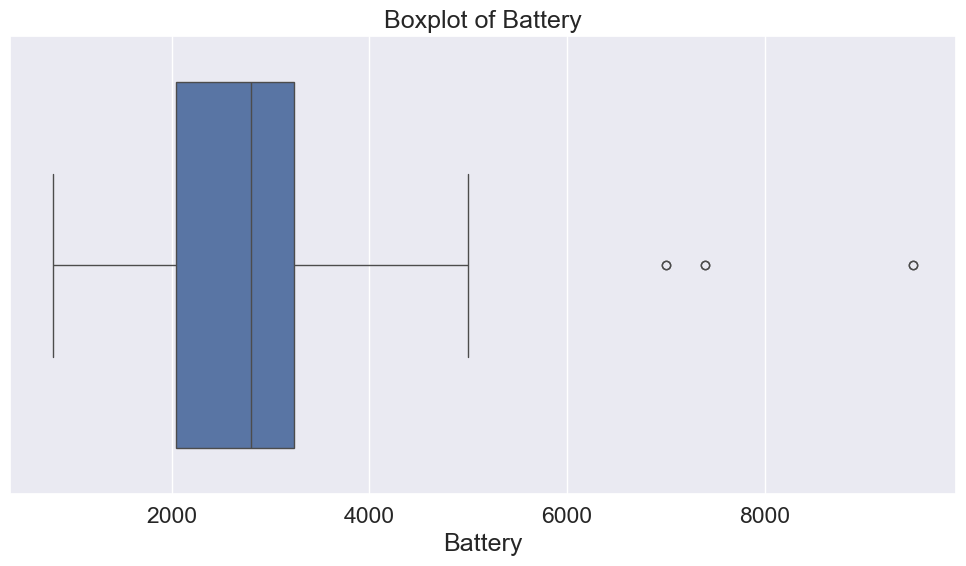

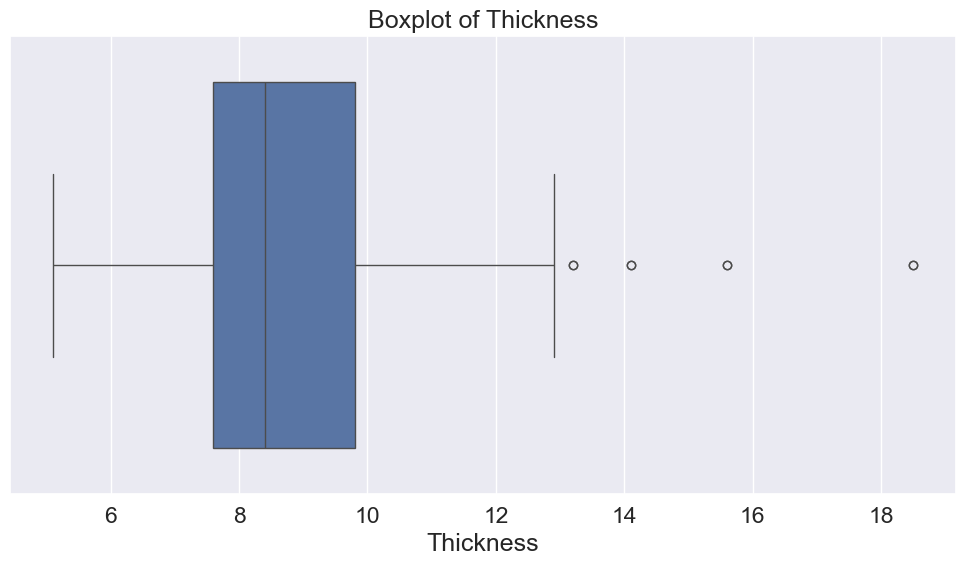

In [26]:
numerical_cols = Mobile_df.select_dtypes(include=['number']).drop(columns = ['Price']).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x= Mobile_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Checking which columns has how many outliers

In [27]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
    
# Apply the function to each numeric column
for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df[col]) 
    print(f"Column: {col} | Outlier Detected : {len(outliers)}")

Column: Sale | Outlier Detected : 24
Column: Weight | Outlier Detected : 24
Column: Resolution | Outlier Detected : 26
Column: PPI | Outlier Detected : 2
Column: CPU Core | Outlier Detected : 0
Column: CPU Freq | Outlier Detected : 10
Column: Internal Mem | Outlier Detected : 8
Column: RAM | Outlier Detected : 0
Column: Rear Cam | Outlier Detected : 0
Column: Front Cam | Outlier Detected : 0
Column: Battery | Outlier Detected : 6
Column: Thickness | Outlier Detected : 8


### Clearly we can see that:
### For sale there are : 24 outliers
### For weight there are : 24 outliers
### For resolution there are : 26 outliers
### For PPI there are : 2 outliers
### For CPU Freq there are : 10 outliers
### For Internal Mem there are : 8 outliers
### For Battery there are : 6 outliers
### For Thickness there are : 8 outliers

# We will check how many rows have outliers out of the total rows

In [28]:
outlier_rows = set()

for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df[col])
    outlier_rows.update(outliers.index)  # Add the index of outlier rows to the set

print(f"Rows with at least one outlier: {len(outlier_rows)} / {len(Mobile_df)}")
print(f"Total Percentage of outlier as a whole: ({len(outlier_rows)} / {len(Mobile_df)}) * 100 = {(len(outlier_rows) / len(Mobile_df)) * 100:.2f}%")

Rows with at least one outlier: 48 / 161
Total Percentage of outlier as a whole: (48 / 161) * 100 = 29.81%


# We can clearly see that 29.81% out of the total rows has an outliers so we will treat the outliers using capping method

In [29]:
Mobile_df_capped = Mobile_df.copy()

for col in numerical_cols:
    Q1 = Mobile_df[col].quantile(0.25)
    Q3 = Mobile_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    Mobile_df_capped[col] = Mobile_df[col].clip(lower, upper)  # Cap values


# Checking outliers after treating

In [30]:
# Check for outliers after capping
print("\n Outliers after capping:")

for col in numerical_cols:
    outliers = detect_outlier_iqr(Mobile_df_capped[col]) 
    print(f"Column: {col} | Outlier Detected: {len(outliers)}")



 Outliers after capping:
Column: Sale | Outlier Detected: 0
Column: Weight | Outlier Detected: 0
Column: Resolution | Outlier Detected: 0
Column: PPI | Outlier Detected: 0
Column: CPU Core | Outlier Detected: 0
Column: CPU Freq | Outlier Detected: 0
Column: Internal Mem | Outlier Detected: 0
Column: RAM | Outlier Detected: 0
Column: Rear Cam | Outlier Detected: 0
Column: Front Cam | Outlier Detected: 0
Column: Battery | Outlier Detected: 0
Column: Thickness | Outlier Detected: 0


# Visualization after treating the outliers

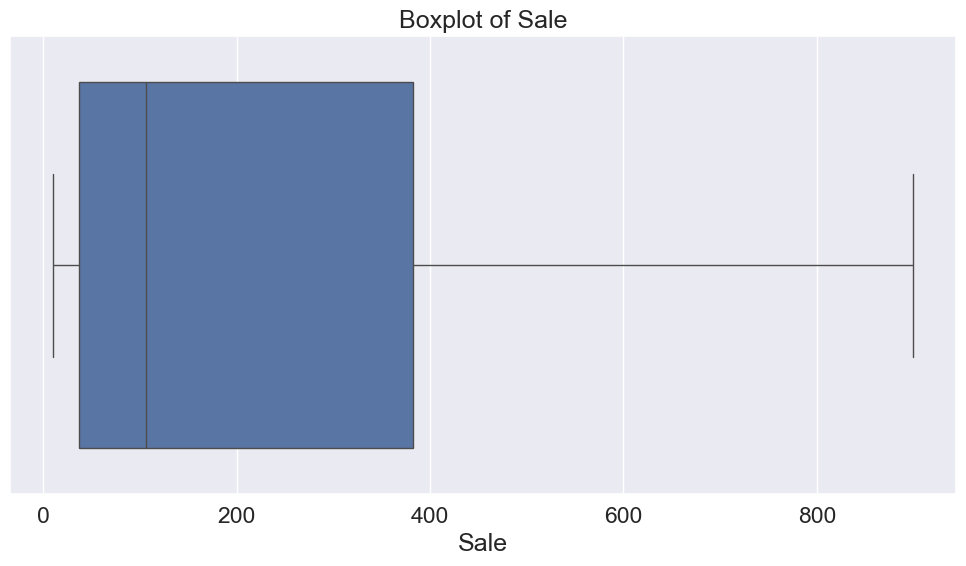

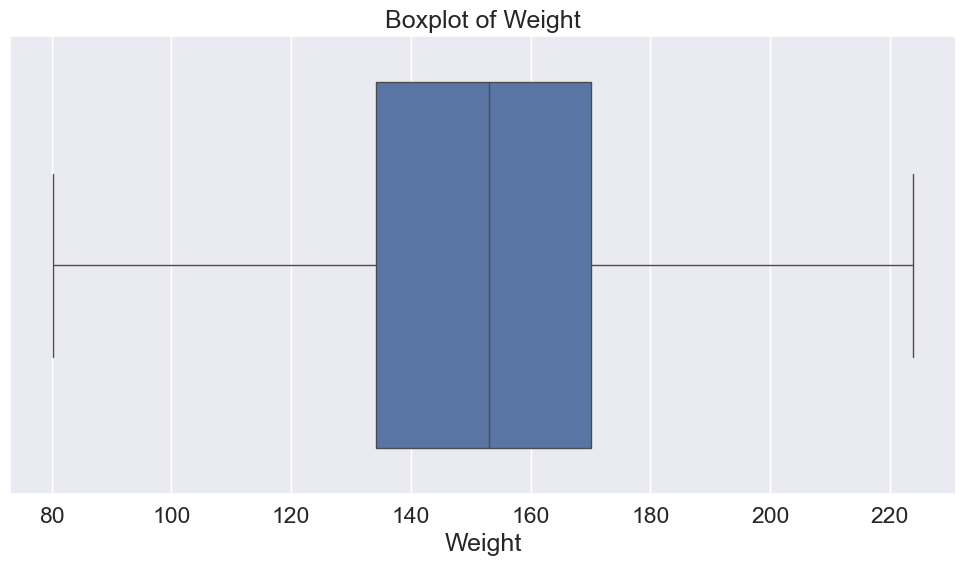

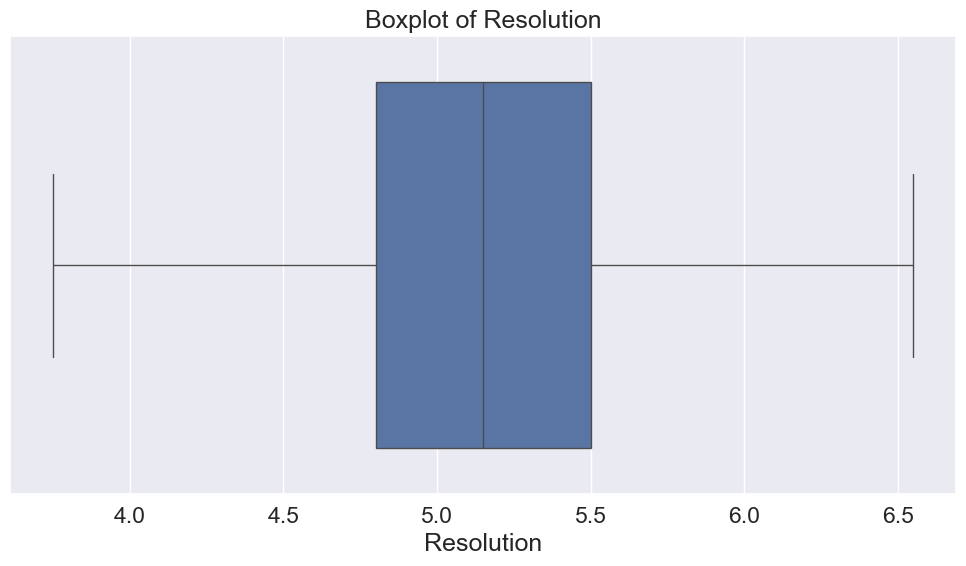

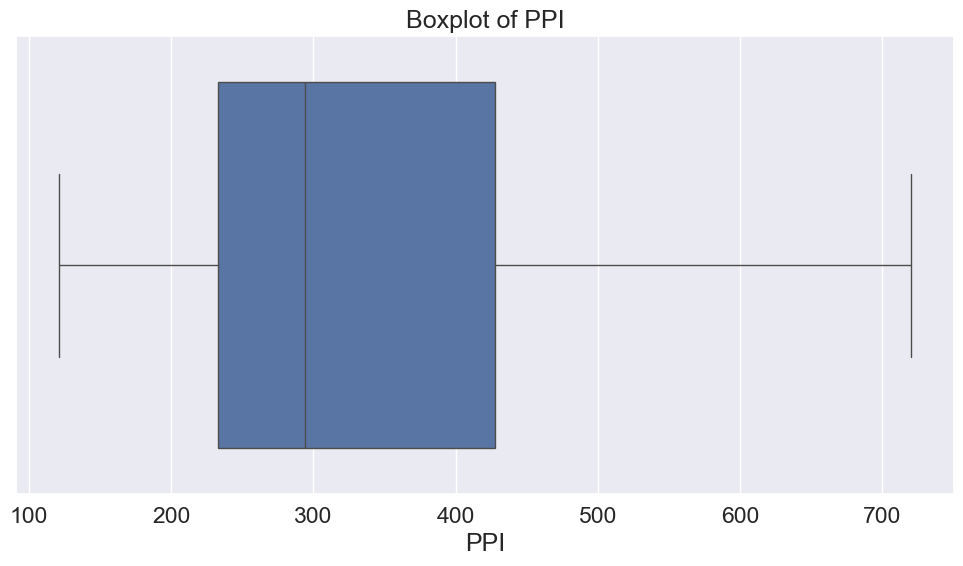

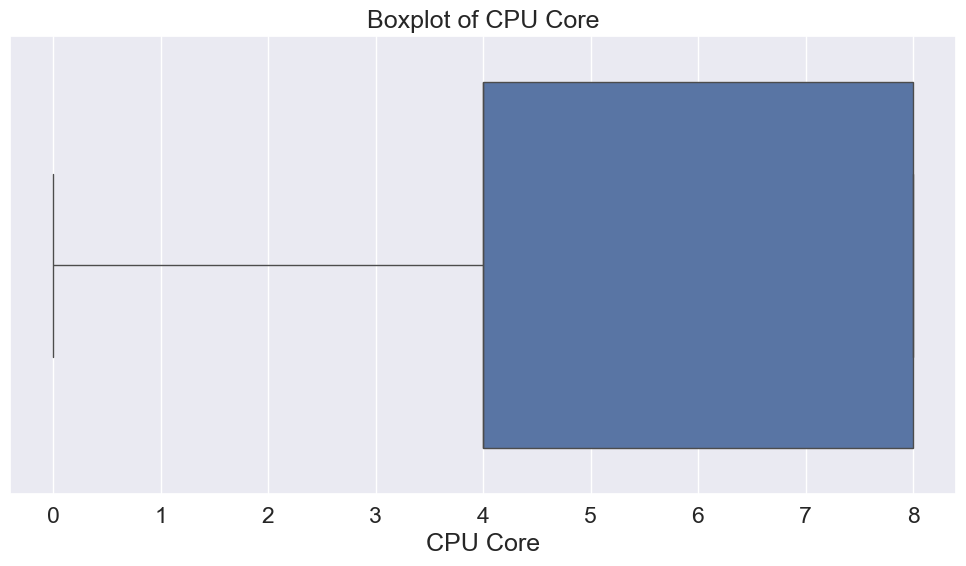

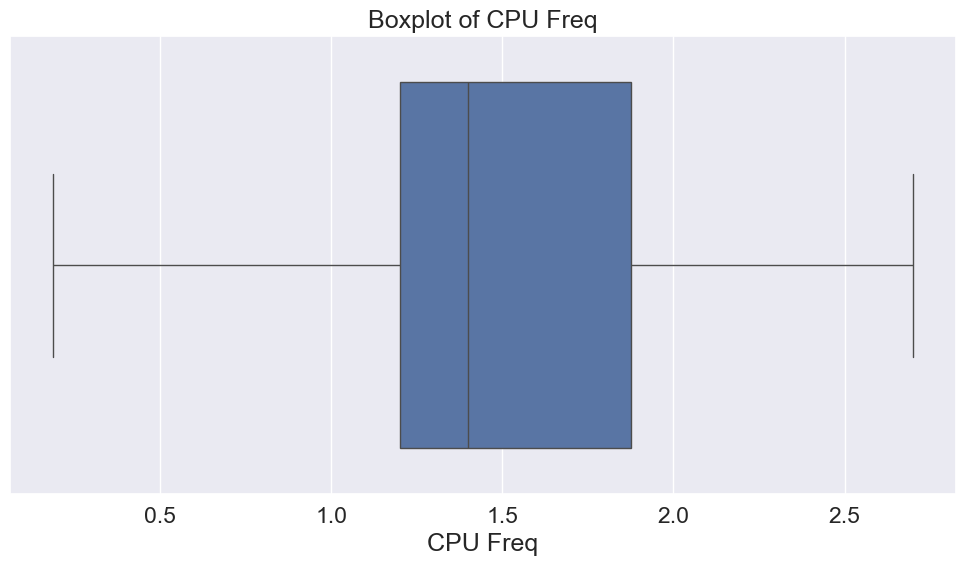

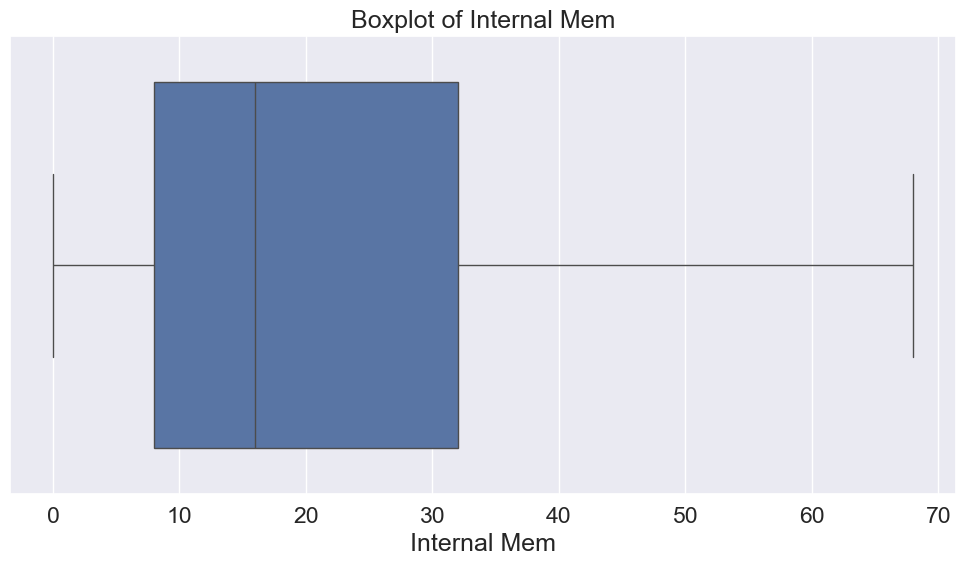

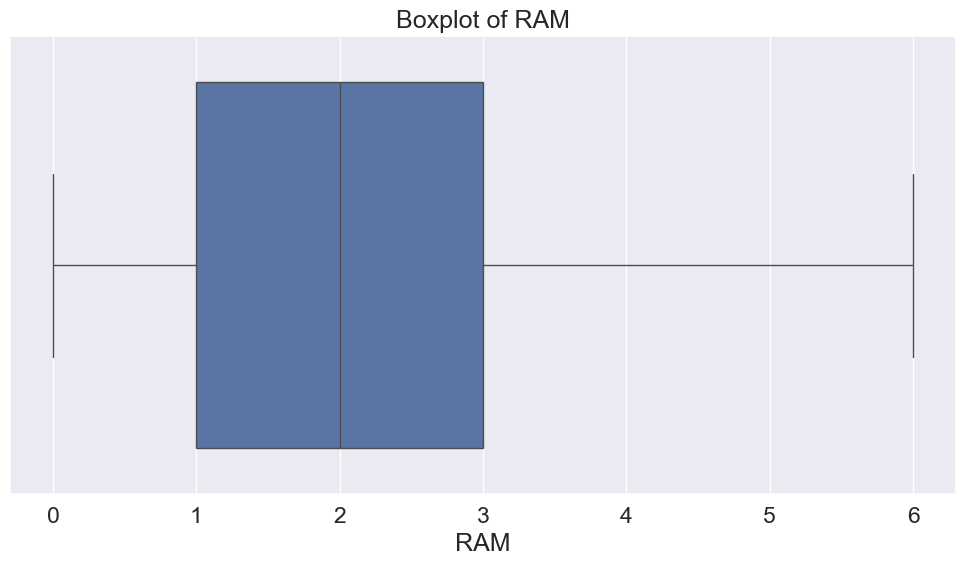

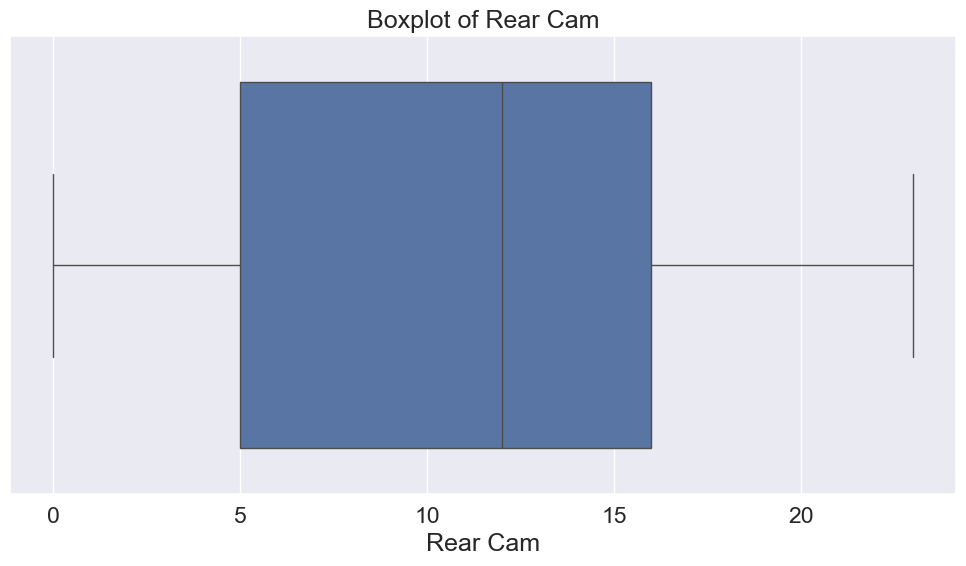

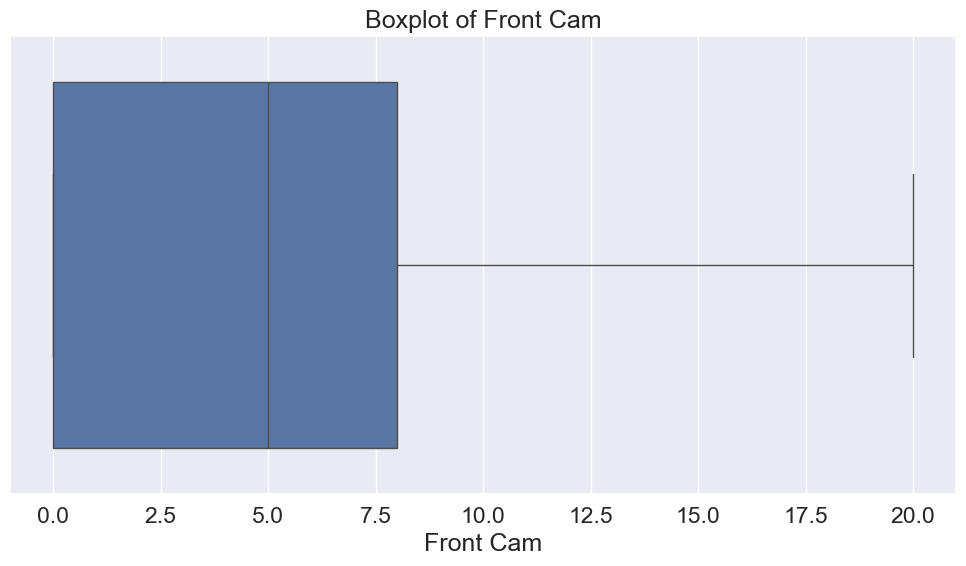

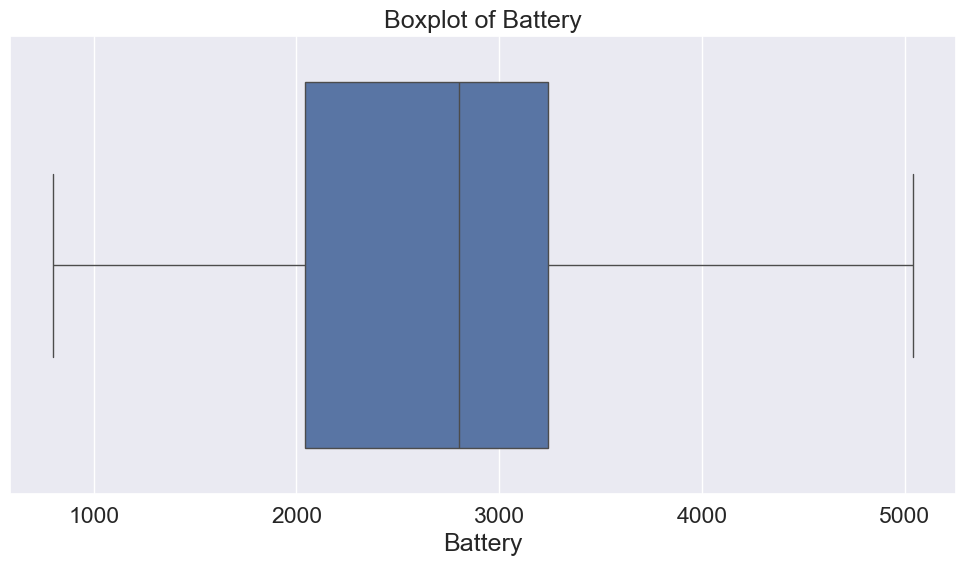

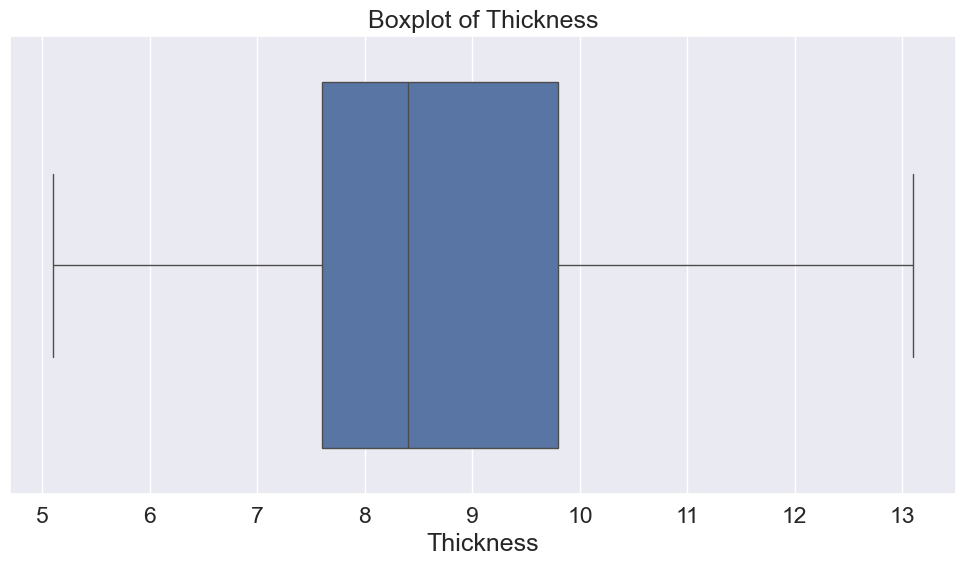

In [31]:
numerical_cols = Mobile_df_capped.select_dtypes(include=['number']).drop(columns = ['Price']).columns
for col in numerical_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x= Mobile_df_capped[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# So clearly after the outlier treatment there is no outlier

# Now we will check for the skewness

## First we will check the Distribution of the Variables

In [32]:
Numerical_col = Mobile_df_capped.select_dtypes(include=['int64', 'float64']).drop(columns = ['Price']).columns

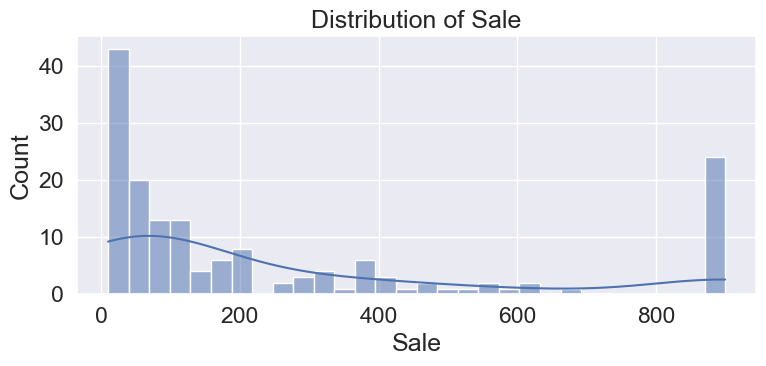

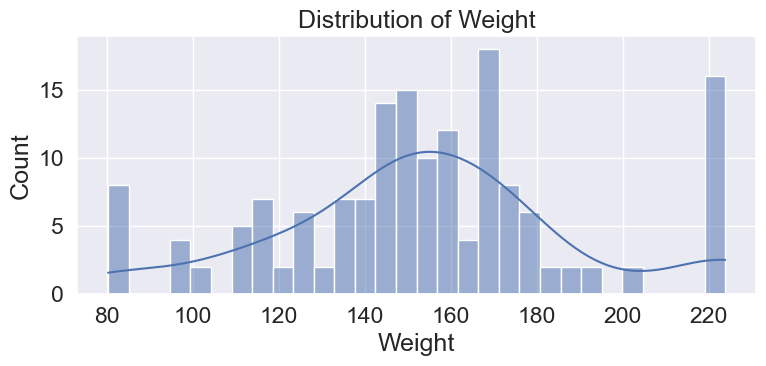

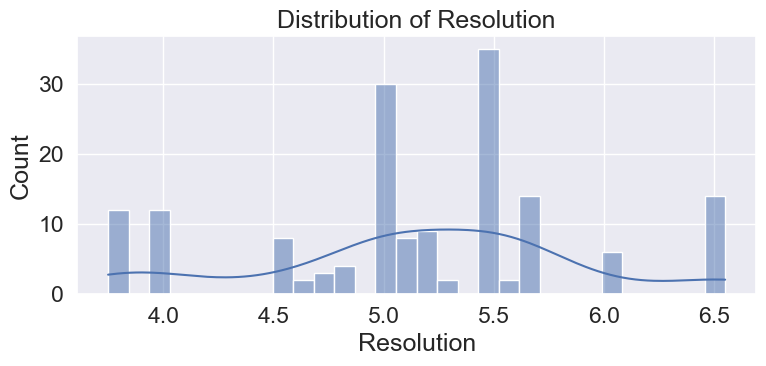

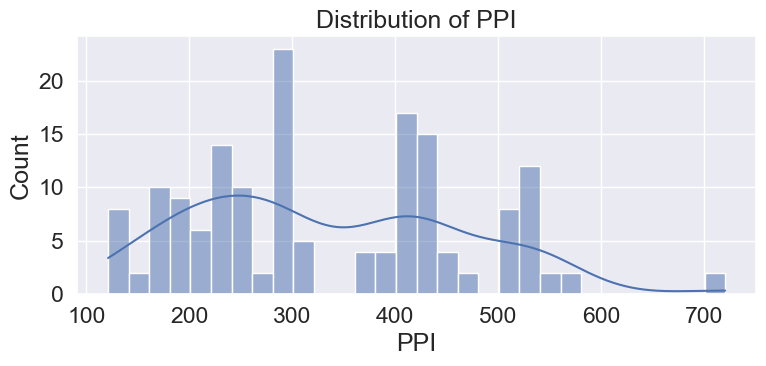

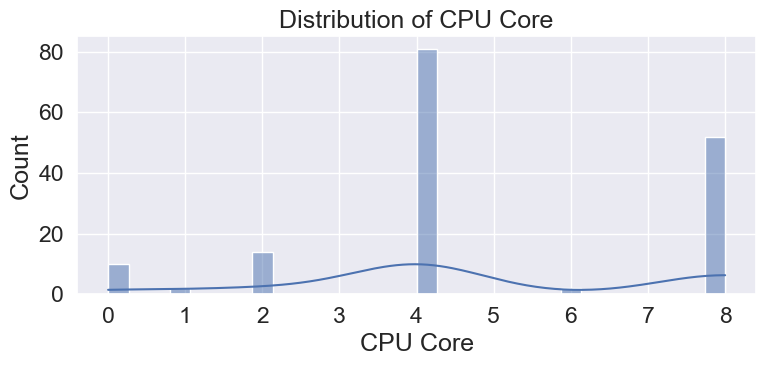

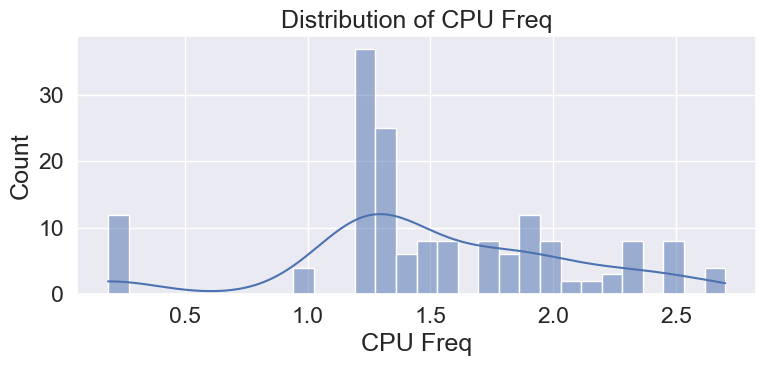

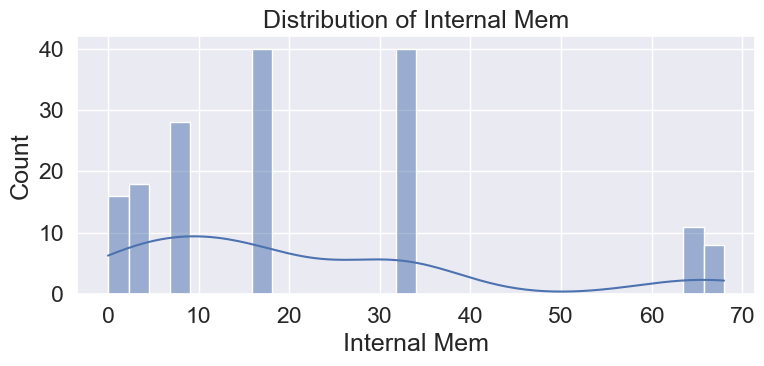

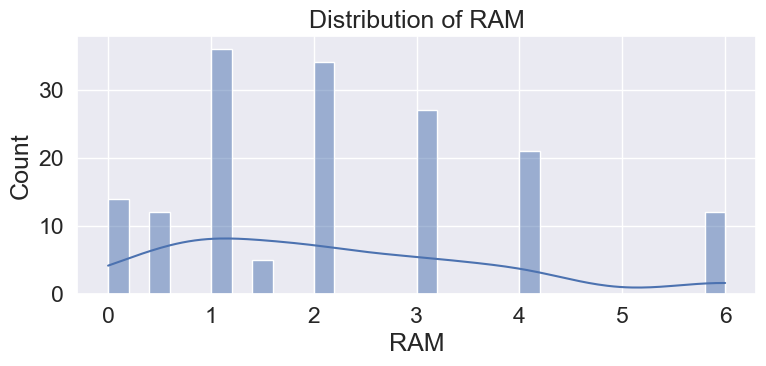

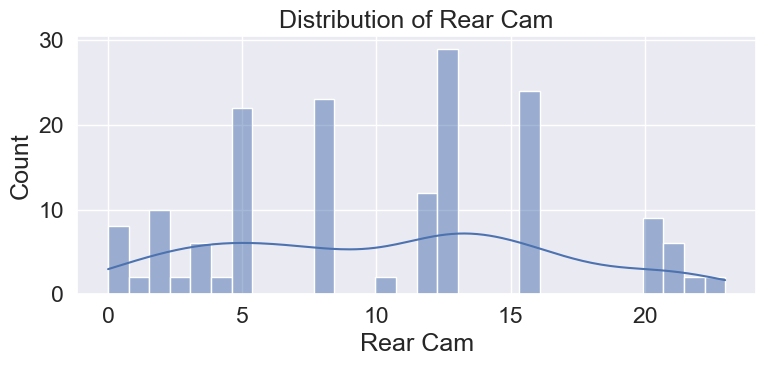

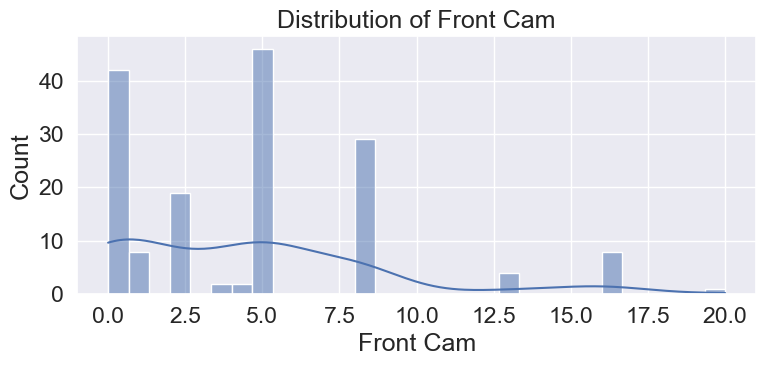

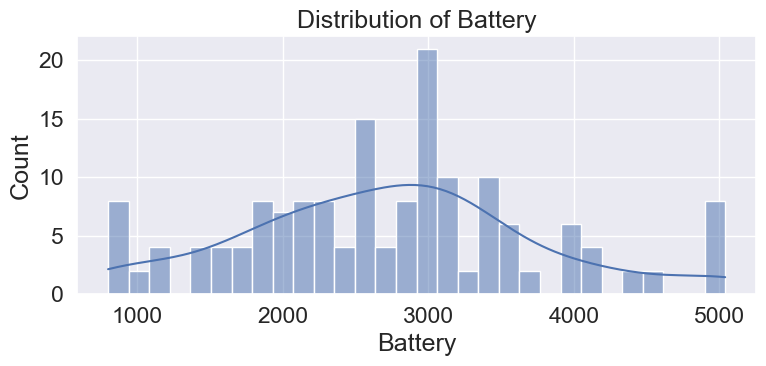

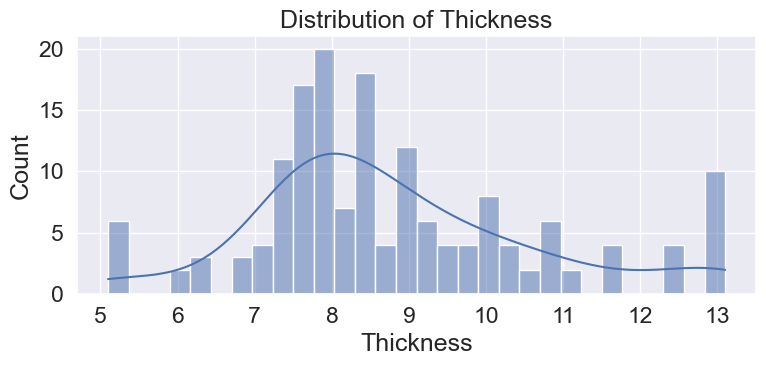

In [33]:
for feature in Numerical_col:
    plt.figure(figsize = (8,4))
    sns.histplot(Mobile_df_capped[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [34]:
Skewness_before = Mobile_df_capped.skew()
print(Skewness_before)

Price           0.052347
Sale            1.250054
Weight          0.115564
Resolution     -0.170940
PPI             0.412330
CPU Core       -0.009077
CPU Freq       -0.275330
Internal Mem    1.164121
RAM             0.792698
Rear Cam        0.106929
Front Cam       1.169750
Battery         0.237390
Thickness       0.629078
dtype: float64


## We can clearly see that:
# Sale and Internal Mem:
### are highly skewed (so we will treat them using Logarithmic Transformation)
#  Front Cam
### is highly skewed (so we will treat it using Boxcox Transformation)
# And RAM and Thickness:
### are moderately skewed (so we will treat them using SQRT Transformation)

In [35]:
from scipy.stats import boxcox

In [36]:
# Applying logarithmetic transformation for highly skewed feature
Transformed_Mobile_df = Mobile_df_capped.copy()

Transformed_Mobile_df['Sale'] = np.log(Transformed_Mobile_df['Sale'] + 1 )

Transformed_Mobile_df['Front Cam'] = np.log(Transformed_Mobile_df['Front Cam'] + 1)

# Applying boxcox transformation for the Internal Mem

Transformed_Mobile_df['Internal Mem'], _ = boxcox(Transformed_Mobile_df['Internal Mem'] + 1)  # Adding 1 to avoid log(0)


# Applying squareroot transformation for moderately skewed feature

Transformed_Mobile_df['RAM'] = np.sqrt(Transformed_Mobile_df['RAM'])

Transformed_Mobile_df['Thickness'] = np.sqrt(Transformed_Mobile_df['Thickness'])

# Recalculate and check skewness after transformation

Skewness_after = Transformed_Mobile_df.skew()
Skewness_after

Price           0.052347
Sale            0.057420
Weight          0.115564
Resolution     -0.170940
PPI             0.412330
CPU Core       -0.009077
CPU Freq       -0.275330
Internal Mem   -0.076547
RAM            -0.276718
Rear Cam        0.106929
Front Cam      -0.316747
Battery         0.237390
Thickness       0.318092
dtype: float64

# Now checking the distribution after the transformation is done

In [37]:
Numerical_col = Transformed_Mobile_df.select_dtypes(include=['int64', 'float64']).drop(columns = ['Price']).columns

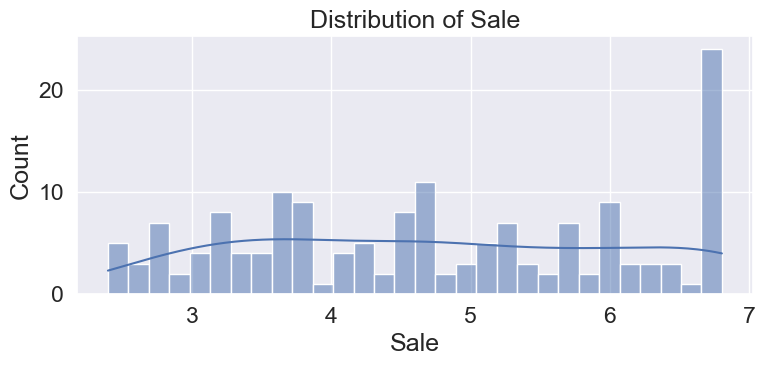

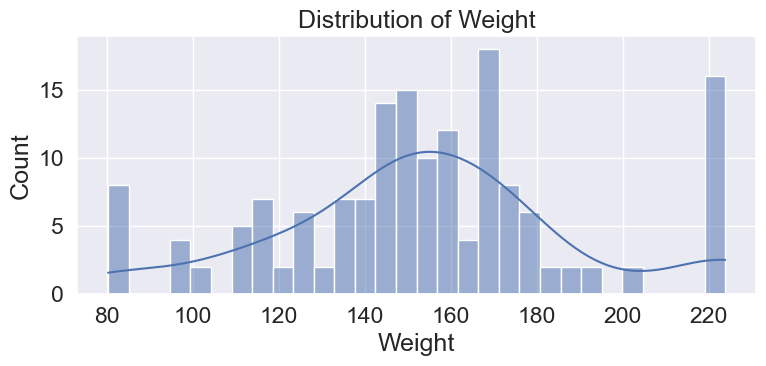

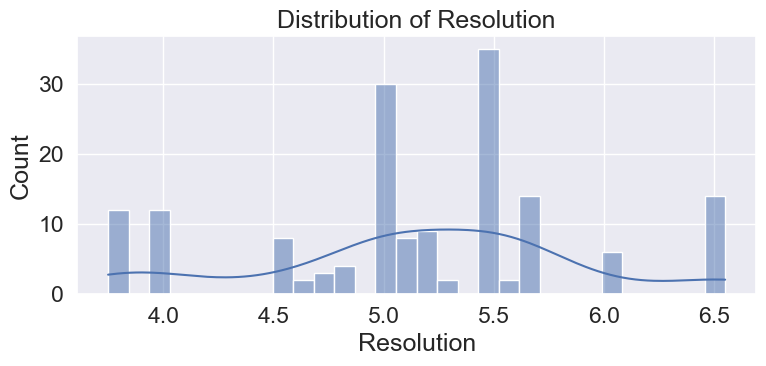

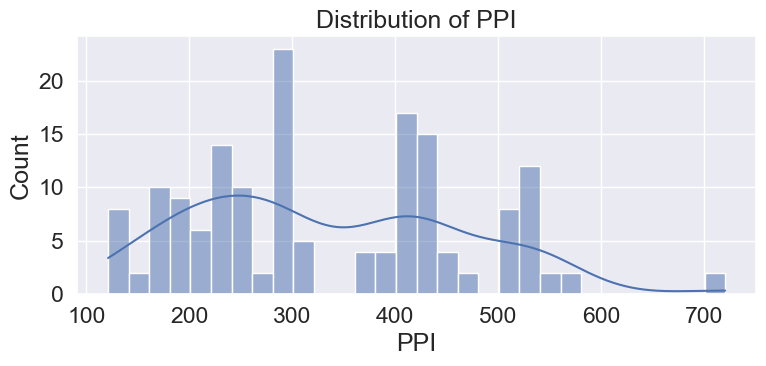

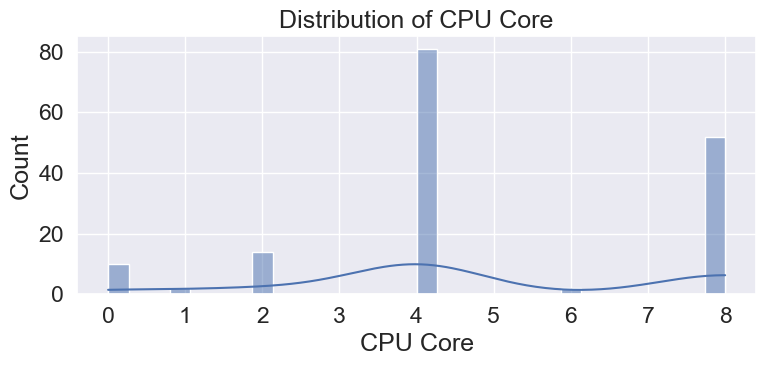

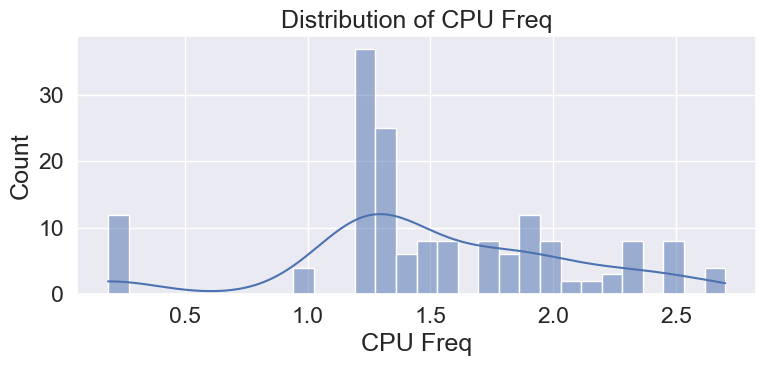

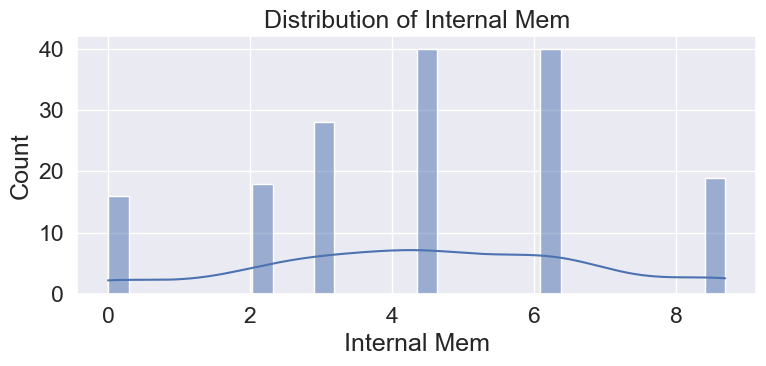

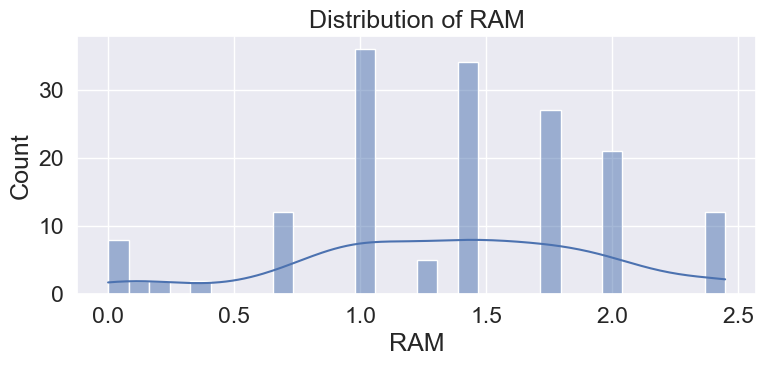

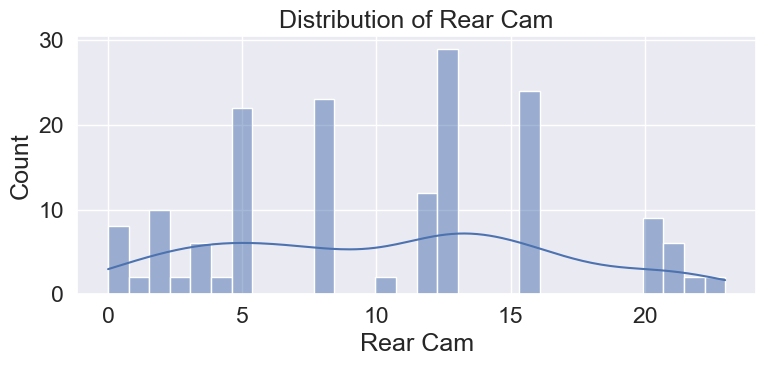

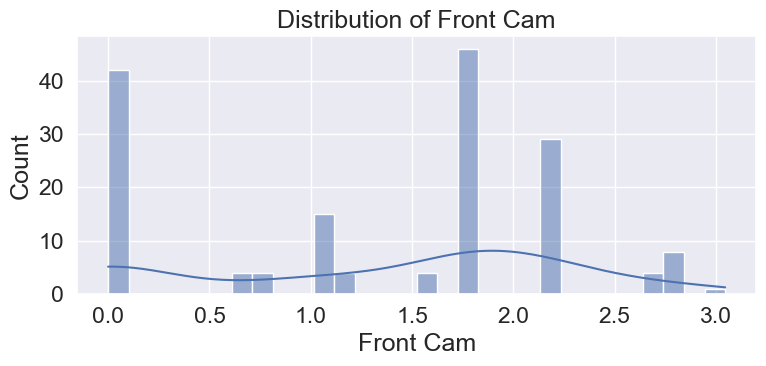

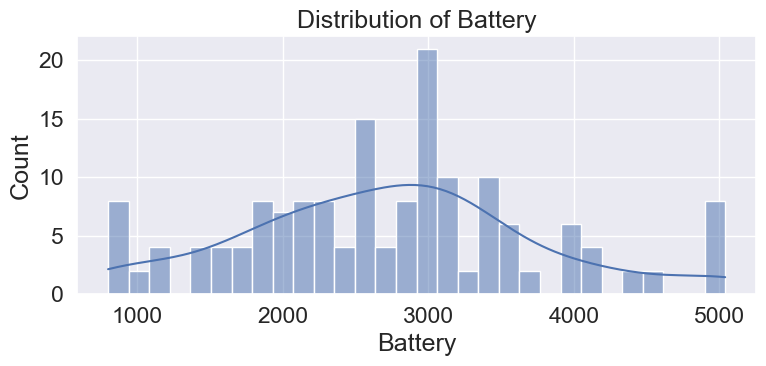

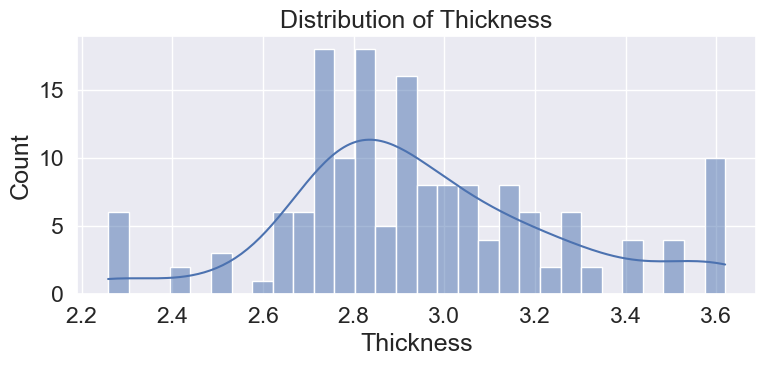

In [38]:
for feature in Numerical_col:
    plt.figure(figsize = (8,4))
    sns.histplot(Transformed_Mobile_df[feature], kde = True, bins = 30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [39]:
Transformed_Mobile_df.head(5)

Price      Sale  Weight  Resolution    PPI  CPU Core  CPU Freq  \
0   2357  2.397895   135.0         5.2  424.0         8      1.35   
1   1749  2.397895   125.0         4.0  233.0         2      1.30   
2   1916  2.397895   110.0         4.7  312.0         4      1.20   
3   1315  2.484907   118.5         4.0  233.0         2      1.30   
4   1749  2.484907   125.0         4.0  233.0         2      1.30   

   Internal Mem       RAM  Rear Cam  Front Cam  Battery  Thickness  
0      4.517506  1.732051     13.00   2.197225     2610   2.720294  
1      2.081855  1.000000      3.15   0.000000     1700   3.146427  
2      3.138048  1.224745     13.00   1.791759     2000   2.756810  
3      2.081855  0.715542      3.15   0.000000     1400   3.316625  
4      2.081855  1.000000      3.15   0.000000     1700   3.146427

## So, clearly we can see that there are some variables which has bigger magnitude so we will treat them using standard scaler.

In [40]:
Final_df = Transformed_Mobile_df.drop(columns = ['Price'])
Final_df.head(5)

Sale  Weight  Resolution    PPI  CPU Core  CPU Freq  Internal Mem  \
0  2.397895   135.0         5.2  424.0         8      1.35      4.517506   
1  2.397895   125.0         4.0  233.0         2      1.30      2.081855   
2  2.397895   110.0         4.7  312.0         4      1.20      3.138048   
3  2.484907   118.5         4.0  233.0         2      1.30      2.081855   
4  2.484907   125.0         4.0  233.0         2      1.30      2.081855   

        RAM  Rear Cam  Front Cam  Battery  Thickness  
0  1.732051     13.00   2.197225     2610   2.720294  
1  1.000000      3.15   0.000000     1700   3.146427  
2  1.224745     13.00   1.791759     2000   2.756810  
3  0.715542      3.15   0.000000     1400   3.316625  
4  1.000000      3.15   0.000000     1700   3.146427

In [41]:
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['Weight','PPI','Battery','Rear Cam','Resolution','CPU Core']

# Fit and transform
Final_df[columns_to_scale] = scaler.fit_transform(Final_df[columns_to_scale])

# Preview the scaled data
Final_df.head(10)


Sale    Weight  Resolution       PPI  CPU Core  CPU Freq  Internal Mem  \
0  2.397895 -0.551575    0.055352  0.687198  1.289952      1.35      4.517506   
1  2.397895 -0.838872   -1.589876 -0.771088 -1.172684      1.30      2.081855   
2  2.397895 -1.269818   -0.630160 -0.167923 -0.351805      1.20      3.138048   
3  2.484907 -1.025616   -1.589876 -0.771088 -1.172684      1.30      2.081855   
4  2.484907 -0.838872   -1.589876 -0.771088 -1.172684      1.30      2.081855   
5  2.564949 -0.120629    0.466659  0.511593 -0.351805      2.30      4.517506   
6  2.639057 -0.577432   -1.589876 -0.771088 -1.172684      1.20      3.138048   
7  2.639057 -0.120629    0.466659  0.511593 -0.351805      2.30      4.517506   
8  2.708050 -1.025616   -1.589876 -0.771088 -1.172684      1.30      2.081855   
9  2.772589 -0.264278   -0.081750  0.748278 -0.351805      2.50      4.517506   

        RAM  Rear Cam  Front Cam   Battery  Thickness  
0  1.732051  0.425444   2.197225 -0.122938   2.720294  
1  1.000000 -1.172970   0.000000 -1.032161   3.146427  
2  1.224745  0.425444   1.791759 -0.732417   2.756810  
3  0.715542 -1.172970   0.000000 -1.331904   3.316625  
4  1.000000 -1.172970   0.000000 -1.032161   3.146427  
5  1.414214  0.912271   2.197225 -0.232844   3.082207  
6  1.000000 -1.359587   0.000000 -1.172041   3.420526  
7  1.414214  0.912271   2.197225 -0.232844   3.082207  
8  0.715542 -1.172970   0.000000 -1.331904   3.316625  
9  1.414214  0.912271   1.098612  0.066899   2.846050

## Adding the Price column back to the final Data Frame after the standard scaling

In [42]:
# Add the Price column back to Final_df
Final_df['Price'] = Transformed_Mobile_df['Price']

# Preview the updated dataframe
Final_df.head(10)

Sale    Weight  Resolution       PPI  CPU Core  CPU Freq  Internal Mem  \
0  2.397895 -0.551575    0.055352  0.687198  1.289952      1.35      4.517506   
1  2.397895 -0.838872   -1.589876 -0.771088 -1.172684      1.30      2.081855   
2  2.397895 -1.269818   -0.630160 -0.167923 -0.351805      1.20      3.138048   
3  2.484907 -1.025616   -1.589876 -0.771088 -1.172684      1.30      2.081855   
4  2.484907 -0.838872   -1.589876 -0.771088 -1.172684      1.30      2.081855   
5  2.564949 -0.120629    0.466659  0.511593 -0.351805      2.30      4.517506   
6  2.639057 -0.577432   -1.589876 -0.771088 -1.172684      1.20      3.138048   
7  2.639057 -0.120629    0.466659  0.511593 -0.351805      2.30      4.517506   
8  2.708050 -1.025616   -1.589876 -0.771088 -1.172684      1.30      2.081855   
9  2.772589 -0.264278   -0.081750  0.748278 -0.351805      2.50      4.517506   

        RAM  Rear Cam  Front Cam   Battery  Thickness  Price  
0  1.732051  0.425444   2.197225 -0.122938   2.720294   2357  
1  1.000000 -1.172970   0.000000 -1.032161   3.146427   1749  
2  1.224745  0.425444   1.791759 -0.732417   2.756810   1916  
3  0.715542 -1.172970   0.000000 -1.331904   3.316625   1315  
4  1.000000 -1.172970   0.000000 -1.032161   3.146427   1749  
5  1.414214  0.912271   2.197225 -0.232844   3.082207   2137  
6  1.000000 -1.359587   0.000000 -1.172041   3.420526   1238  
7  1.414214  0.912271   2.197225 -0.232844   3.082207   2137  
8  0.715542 -1.172970   0.000000 -1.331904   3.316625   1315  
9  1.414214  0.912271   1.098612  0.066899   2.846050   2580

# Now diving the data into training and testing

In [43]:
x = Final_df.drop('Price', axis = 1)
y = Final_df['Price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [45]:
#print shape to confirm
print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

x_train shape : (128, 12)
x_test shape : (33, 12)
y_train shape : (128,)
y_test shape : (33,)


In [46]:
# Store the performance merics in the list

training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [47]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """

    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R2 score
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate the Adjusted R2 scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1-(1- train_r2/100) * (n_train - 1)/(n_train - p_train - 1))
    test_adj_r2 = 100 * (1-(1- test_r2/100) *  (n_test -1)/(n_train - p_train - 1))

    # Calculate RMSE score
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data R2 = {train_r2: .2f}%, Adjusted_r2 = {train_adj_r2:.2f}%, RMSE = {train_rmse: 4f}")
    print(f"Testing Data R2 = {test_r2:2f}%, Adjusted_r2 = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")   

# Linear Regression

## Simple Linear Regression

In [48]:
evaluate_model_performance(
    model = LinearRegression(),
    x_train = x_train,
    y_train = y_train,
    x_test = x_test,
    y_test = y_test
)

LinearRegression Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.231574
Testing Data R2 = 92.866024%, Adjusted_r2 = 98.01%, RMSE = 193.0541



## Ridge Regression

In [49]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.235150
Testing Data R2 = 92.858154%, Adjusted_r2 = 98.01%, RMSE = 193.1606



## Lasso Regression

In [50]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data R2 =  92.94%, Adjusted_r2 = 92.20%, RMSE =  205.235150
Testing Data R2 = 92.858154%, Adjusted_r2 = 98.01%, RMSE = 193.1606



## Elastic Net

In [51]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data R2 =  92.02%, Adjusted_r2 = 91.18%, RMSE =  218.158713
Testing Data R2 = 90.998528%, Adjusted_r2 = 97.50%, RMSE = 216.8553



# DecisionTree Regression

In [52]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data R2 =  100.00%, Adjusted_r2 = 100.00%, RMSE =  0.000000
Testing Data R2 = 98.981411%, Adjusted_r2 = 99.72%, RMSE = 72.9479



# Random Forest

In [53]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data R2 =  99.27%, Adjusted_r2 = 99.20%, RMSE =  65.769609
Testing Data R2 = 95.977587%, Adjusted_r2 = 98.88%, RMSE = 144.9628



# SVR(Support vector Regressor)

In [54]:
from sklearn.svm import SVR

In [55]:
evaluate_model_performance(
    model=SVR(kernel='rbf'),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

SVR Performance Metrics:
Training Data R2 =  3.92%, Adjusted_r2 = -6.11%, RMSE =  756.895005
Testing Data R2 = -4.076528%, Adjusted_r2 = 71.04%, RMSE = 737.3771



# KNN (Kth Nearest Neighbour)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data R2 =  92.55%, Adjusted_r2 = 91.77%, RMSE =  210.804032
Testing Data R2 = 86.843570%, Adjusted_r2 = 96.34%, RMSE = 262.1696



# Ensemble Learning Methods

## Voting Regressor

In [58]:
# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators = 100, random_state = 15)
model3 = KNeighborsRegressor()

In [59]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators = [('lr', model1), ('rf', model2), ('knn', model3)])

In [60]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data R2 =  96.73%, Adjusted_r2 = 96.39%, RMSE =  139.529685
Testing Data R2 = 93.713027%, Adjusted_r2 = 98.25%, RMSE = 181.2317



## Bagging Regressor

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=15)

In [63]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=15,
    n_jobs=-1                 # Use all available cores
)

In [64]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data R2 =  98.81%, Adjusted_r2 = 98.69%, RMSE =  84.074278
Testing Data R2 = 94.659522%, Adjusted_r2 = 98.51%, RMSE = 167.0334



# Ada Boosting

In [65]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data R2 =  96.58%, Adjusted_r2 = 96.22%, RMSE =  142.867177
Testing Data R2 = 94.793433%, Adjusted_r2 = 98.55%, RMSE = 164.9259



# GradientBoosting Regression

In [66]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data R2 =  99.88%, Adjusted_r2 = 99.87%, RMSE =  26.981850
Testing Data R2 = 99.093706%, Adjusted_r2 = 99.75%, RMSE = 68.8094



# XGB Regression

In [67]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data R2 =  100.00%, Adjusted_r2 = 100.00%, RMSE =  0.002835
Testing Data R2 = 98.474979%, Adjusted_r2 = 99.58%, RMSE = 89.2588



# CatBoost Regression

In [68]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data R2 =  99.99%, Adjusted_r2 = 99.99%, RMSE =  5.867708
Testing Data R2 = 98.682376%, Adjusted_r2 = 99.63%, RMSE = 82.9677



In [69]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Ada Boost",
    "Gradient Boost",
    "XGBoost",
    "CatBoost",
    ]

In [70]:
# Ensure all metric lists match the length of the models list
models = models[:14]  # or len(training_scores_r2) if you want to match the metrics

training_scores_r2 = training_scores_r2[:len(models)]
training_scores_adj_r2 = training_scores_adj_r2[:len(models)]
training_scores_rmse = training_scores_rmse[:len(models)]
testing_scores_r2 = testing_scores_r2[:len(models)]
testing_scores_adj_r2 = testing_scores_adj_r2[:len(models)]
testing_scores_rmse = testing_scores_rmse[:len(models)]

# Now create the DataFrame
df_model = pd.DataFrame({
    "Algorithms": models,
    "Training Score R2": training_scores_r2,
    "Training Score Adjusted R2": training_scores_adj_r2,
    "Training Score RMSE": training_scores_rmse,
    "Testing Score R2": testing_scores_r2,
    "Testing Score Adjusted R2": testing_scores_adj_r2,
    "Testing Score RMSE": testing_scores_rmse,
})

# Sort by Testing Score R2
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort


Algorithms  Training Score R2  Training Score Adjusted R2  \
11     Gradient Boost          99.877898                   99.865156   
4       Decision Tree         100.000000                  100.000000   
13           CatBoost          99.994225                   99.993623   
12            XGBoost         100.000000                  100.000000   
5       Random Forest          99.274510                   99.198806   
10          Ada Boost          96.576692                   96.219477   
9   Bagging Regressor          98.814484                   98.690778   
8    Voting Regressor          96.734766                   96.394046   
0   Linear Regression          92.935696                   92.198551   
1               Ridge          92.935450                   92.198279   
2               Lasso          92.935450                   92.198279   
3          ElasticNet          92.017735                   91.184802   
7                 KNN          92.546867                   91.769149   
6                 SVR           3.915724                   -6.110461   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
11            26.981850         99.093706                  99.747814   
4              0.000000         98.981411                  99.716567   
13             5.867708         98.682376                  99.633357   
12             0.002835         98.474979                  99.575646   
5             65.769609         95.977587                  98.880720   
10           142.867177         94.793433                  98.551216   
9             84.074278         94.659522                  98.513954   
8            139.529685         93.713027                  98.250581   
0            205.231574         92.866024                  98.014894   
1            205.235150         92.858154                  98.012704   
2            205.235150         92.858154                  98.012704   
3            218.158713         90.998528                  97.495243   
7            210.804032         86.843570                  96.339080   
6            756.895005         -4.076528                  71.039575   

    Testing Score RMSE  
11           68.809404  
4            72.947885  
13           82.967687  
12           89.258801  
5           144.962815  
10          164.925949  
9           167.033414  
8           181.231662  
0           193.054127  
1           193.160593  
2           193.160593  
3           216.855304  
7           262.169589  
6           737.377148

# Checking for the best model

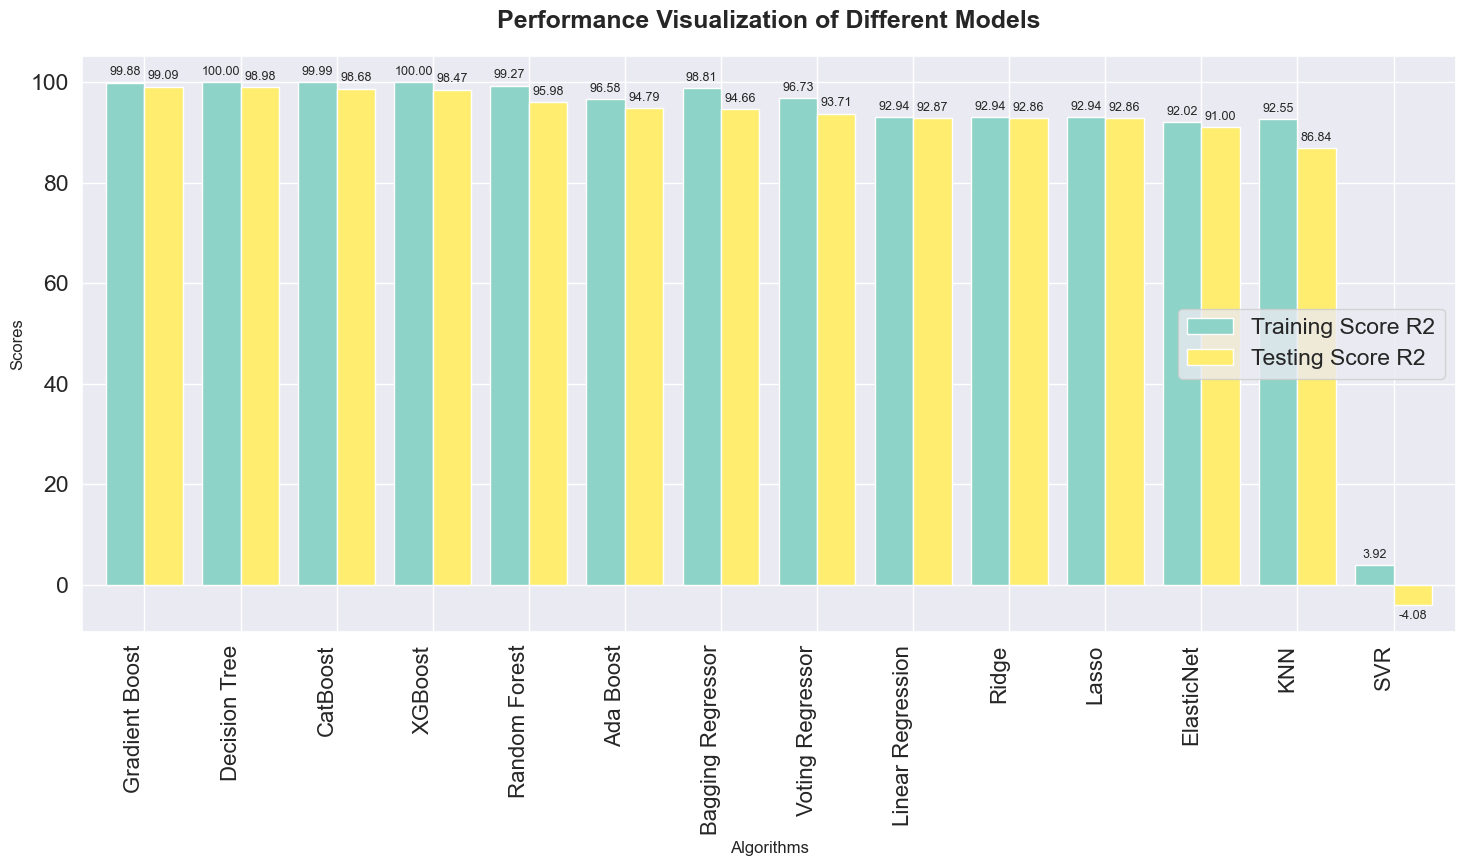

In [71]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# Checking the RMSE Values for each of the models

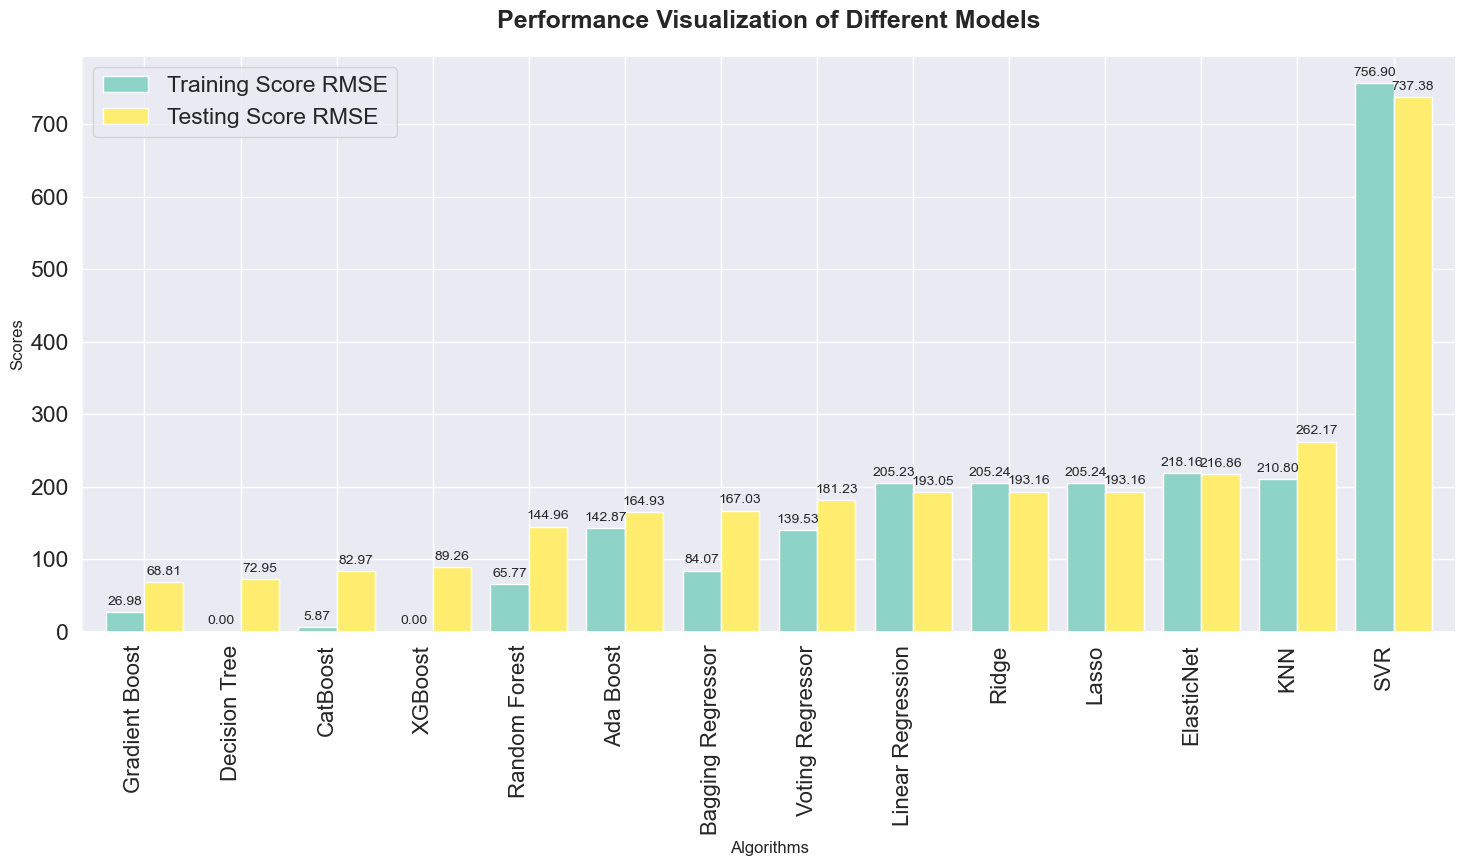

In [72]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# From the above graphs we can infer that Gradient Boost is performing better, and we will send it for further analysis.